<h1><center>Dissertation</center></h1>

<p><b>NOTE:</b>The code may show an error due to change in run time environment as there is difference in software and hardware configurations. To counter this, kindly run the code step by step manually as one time execution of program may show error during the model training as the models may due to some unknown reason, do not pick all independent features effectively in automatic mode which therefore creates a problem in training and hence, the error.</p>

Importing the required libraries to perform our various tasks

In [1]:
import copy
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import chi2
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [3]:
np.random.seed(10)

Here we check whether the dataset that we needed is present in the directory or not

In [4]:
def check_datasets_presence():
    if not os.path.exists(os.path.join(os.getcwd(),"Dissertation_data.csv")):
        if not os.path.exists(os.path.join(os.getcwd(),"Europe data.csv")):
            if not os.path.exists(os.path.join(os.getcwd(),"data_ghg.csv")):
                if not os.path.exists(os.path.join(os.getcwd(),"europe_ghg.xlsx")):
                    print('File is not present in the current directory.')
    else:
        print('All the data files are present in the current directory. Proceeding with further tasks.')

check_datasets_presence()

All the data files are present in the current directory. Proceeding with further tasks.


Reading the data into a dataframe

In [5]:
pd.set_option('display.max_columns', None)

new_df = pd.read_csv('Dissertation_data.csv') #Combined data of 5 countries
df_europe=pd.read_csv('Europe data.csv') #Data of energy consumption of entire Europe 
df_5_ghg=pd.read_csv('data_ghg.csv') # Data of green house gas emissions by 5 countries
df_europe_ghg=pd.read_excel('europe_ghg.xlsx') #Data of green house gas emissions by entire Europe

## Displaying the dataframes ##

In [6]:
new_df.head() #Combined data of 5 countries

,Year,Primary Energy,Fossil Consumption,Total Coal Consumption,Total Gas Consumption,Total Oil Consumption,Nuclear Consumption,Renewable Consumption,Hydro Consumption,Solar Consumption,Wind Consumption,Other Renewables,Population,Labor Force,GDP,Value Added by Activity,Urban Population,GDP per Capita(US $),GNI(Million $),Final Consumption,Total Resource Rent(%GDP),Energy Consumption by Industry,Energy Consumption by Transport,Energy Consumption by Residential,Energy consumption by Public Services,Energy Consumption by Others,GHG Emissions
0,1965,7861.043,7413.145,3929.069,163.365,3320.709,55.783,392.115,384.486,0.0,0.0,7.629,263223824,66865059,2.520000e+12,NaN,139522906,9573.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25652.5236
1,1966,8035.925,7522.357,3699.285,178.933,3644.139,73.037,440.531,429.523,0.0,0.0,11.008,265220195,68033468,2.630000e+12,NaN,141988258,9916.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26053.5260
2,1967,8228.336,7741.817,3555.594,210.388,3975.836,84.360,402.162,390.063,0.0,0.0,12.099,267061434,69334211,2.760000e+12,NaN,144272343,10334.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26193.4349
3,1968,8701.398,8183.842,3561.463,286.174,4336.206,95.625,421.932,408.385,0.0,0.0,13.547,268841039,72224597,2.910000e+12,NaN,146409445,10824.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27381.9046
4,1969,9339.040,8791.516,3585.328,372.586,4833.601,113.983,433.542,418.948,0.0,0.0,14.594,270740514,76257682,3.060000e+12,NaN,148408215,11302.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28946.7211


In [7]:
df_europe.head() #Data of energy consumption of entire Europe 

,year,Primary Energy,Fossil Consumption,Total Coal Consumption,Total Gas Consumption,Total Oil Consumption,Nuclear Consumption,Renewable Consumption,Hydro Consumption,Solar Consumption,Wind Consumption,Other Renewables
0,1965,19238.041,18040.609,9511.276,1595.903,6933.429,61.113,1136.317,1127.945,0.0,0.0,0.002
1,1966,20040.381,18725.217,9385.440,1786.635,7553.143,79.039,1236.124,1224.356,0.0,0.0,0.001
2,1967,20787.127,19468.816,9256.840,2008.786,8203.192,91.163,1227.145,1214.293,0.0,0.0,0.003
3,1968,21936.936,20525.172,9308.798,2280.009,8936.366,104.833,1306.930,1292.505,0.0,0.0,0.001
4,1969,23295.482,21843.688,9432.775,2583.965,9826.947,126.938,1324.856,1309.095,0.0,0.0,0.000


In [8]:
df_5_ghg.head() # Data of green house gas emissions by 5 countries

,Year,France,france_fossil,Germany,germany_fossil,Italy,italy_fossil,Spain,spain_fossil,United Kingdom,uk_fossil,Total_emission
0,1965.0,362.96,1168.484,960.10,2921.022,189.53,784.806,71.02,279.192,622.11,2259.641,2205.72
1,1966.0,379.11,1181.734,951.42,2924.401,213.98,858.300,77.62,301.201,618.07,2256.721,2240.20
2,1967.0,403.42,1285.172,936.23,2916.715,234.13,947.664,86.39,344.546,592.06,2247.720,2252.23
3,1968.0,416.95,1345.749,984.79,3115.431,249.17,1035.889,97.02,360.669,606.49,2326.104,2354.42
4,1969.0,442.19,1490.121,1052.00,3365.219,269.66,1132.354,96.74,397.363,628.38,2406.459,2488.97


In [9]:
df_europe_ghg.head() #Data of green house gas emissions by entire Europe

,Year,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Italy,Latvia,Liechtenstein,Lithuania,Luxembourg,Malta,Moldova,Montenegro,Netherlands,Norway,Poland,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Total
0,1965,2.17,0.0,38.14,52.54,105.33,7.34,46.27,7.93,122.20,44.29,19.10,25.30,362.96,960.10,17.00,61.23,1.40,13.72,189.53,12.61,0.0,19.51,12.19,0.47,20.51,0.72,100.40,16.39,246.98,11.58,78.64,21.34,39.05,6.06,71.02,62.56,30.33,366.52,622.11,3815.54
1,1966,2.55,0.0,39.21,55.50,105.10,7.27,48.72,7.86,121.52,50.08,20.17,29.49,379.11,951.42,18.62,61.67,1.49,15.09,213.98,13.32,0.0,20.60,11.61,0.41,21.67,0.72,103.56,19.54,252.43,11.84,84.09,21.15,38.81,6.00,77.62,72.52,31.49,387.01,618.07,3921.31
2,1967,2.68,0.0,39.92,58.06,107.36,7.35,55.11,7.95,121.28,49.03,21.09,28.59,403.42,936.23,19.50,58.77,1.44,16.39,234.13,13.93,0.0,21.57,11.35,0.52,22.68,0.72,106.68,19.30,259.03,12.39,92.03,21.37,38.72,6.06,86.39,68.93,32.52,404.61,592.06,3979.16
3,1968,3.07,0.0,42.30,59.72,118.44,7.86,59.46,8.50,126.88,53.27,21.68,33.28,416.95,984.79,22.29,61.09,1.59,17.80,249.17,14.33,0.0,22.19,12.26,0.64,23.33,0.78,113.45,21.11,275.80,12.99,100.08,22.86,40.52,6.48,97.02,77.61,35.98,415.91,606.49,4187.97
4,1969,3.24,0.0,44.64,62.22,123.49,8.15,66.31,8.82,134.69,59.34,22.58,37.90,442.19,1052.00,25.43,62.36,1.26,18.49,269.66,14.92,0.0,23.13,13.18,0.65,24.30,0.80,115.80,22.19,293.37,14.59,111.53,23.70,43.03,6.72,96.74,86.38,38.05,433.11,628.38,4433.34


# Exploratory Data Analysis #

In [10]:
print('Number of rows and columns in combined dataset of energy consumption of 5 countries:',new_df.shape)
print('-------------------------------------------------------------------------------------------------')
print("Number of rows and columns in combined dataset of entire Europe's energy consumption:",df_europe.shape)
print('-------------------------------------------------------------------------------------------------')
print('Number of rows and columns in combined dataset of greenhouse emissions of 5 countries:',df_5_ghg.shape)
print('-------------------------------------------------------------------------------------------------')
print('Number of rows and columns in combined dataset of greenhouse emissions of entire Europe:',df_europe.shape)

Number of rows and columns in combined dataset of energy consumption of 5 countries: (57, 27)
-------------------------------------------------------------------------------------------------
Number of rows and columns in combined dataset of entire Europe's energy consumption: (57, 12)
-------------------------------------------------------------------------------------------------
Number of rows and columns in combined dataset of greenhouse emissions of 5 countries: (57, 12)
-------------------------------------------------------------------------------------------------
Number of rows and columns in combined dataset of greenhouse emissions of entire Europe: (57, 12)


<p>Obtaining more information about dataset</p>

In [11]:
new_df.describe()

,Year,Primary Energy,Fossil Consumption,Total Coal Consumption,Total Gas Consumption,Total Oil Consumption,Nuclear Consumption,Renewable Consumption,Hydro Consumption,Solar Consumption,Wind Consumption,Other Renewables,Population,Labor Force,GDP,Value Added by Activity,Urban Population,GDP per Capita(US $),GNI(Million $),Final Consumption,Total Resource Rent(%GDP),Energy Consumption by Industry,Energy Consumption by Transport,Energy Consumption by Residential,Energy consumption by Public Services,Energy Consumption by Others,GHG Emissions
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,51.000000,5.700000e+01,57.000000,5.200000e+01,5.200000e+01,5.200000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,56.000000
mean,1993.000000,11852.282404,9797.159825,2425.588842,2191.632702,5179.938175,1268.365123,786.757316,449.261228,48.977474,149.236158,139.282456,2.950393e+08,9.348487e+07,8.311754e+12,10.043934,1.725904e+08,27692.484737,5.826042e+06,4.697115e+12,2.697231e+12,7741.697490,7629.569509,14409.349250,3433.447840,3463.778713,29377.793280
std,16.598193,1450.868962,955.455045,791.087572,1033.809835,679.032580,745.881112,508.123589,50.086029,98.714647,244.264860,180.247438,1.774203e+07,9.772914e+06,2.928201e+12,11.576928,1.657594e+07,8446.627581,3.740823e+06,1.224521e+12,1.394184e+12,1052.959061,1556.221256,1497.821943,463.456372,334.828586,2713.833086
min,1965.000000,7861.043000,7413.145000,705.879000,163.365000,3320.709000,55.783000,387.042000,339.823000,0.000000,0.000000,7.629000,2.632238e+08,6.686506e+07,2.520000e+12,-42.133085,1.395229e+08,9573.600000,7.995561e+05,2.390000e+12,6.380000e+11,6249.688047,4378.529234,10877.445860,2701.873422,2729.761094,20506.597500
25%,1979.000000,11135.444000,9328.082000,1888.310000,1539.136000,4754.817000,396.287000,461.437000,408.385000,0.000000,0.000000,21.470000,2.815794e+08,8.845694e+07,6.220000e+12,6.844474,1.612081e+08,22089.690000,2.652350e+06,3.600000e+12,1.530000e+12,7115.652855,6097.801095,13328.535160,3067.456379,3183.073491,27560.890300
50%,1993.000000,12220.305000,10033.245000,2272.118000,2265.555000,5302.291000,1550.029000,547.078000,441.688000,0.074000,2.777000,28.470000,2.940192e+08,9.563277e+07,8.360000e+12,11.561095,1.714823e+08,28545.500000,5.144546e+06,4.780000e+12,2.525000e+12,7623.847380,8349.865001,14822.767420,3361.870957,3494.869373,30291.265400
75%,2007.000000,12670.890000,10538.556000,3053.620000,3114.376000,5605.460000,1886.709000,870.650000,480.927000,10.507000,230.317000,222.933000,3.113590e+08,1.003009e+08,1.110000e+13,15.270363,1.874099e+08,35477.680000,8.911377e+06,5.890000e+12,3.265000e+12,7898.782744,8843.494302,15510.526330,3880.580371,3718.826639,31168.225550
max,2021.000000,13872.189000,11051.523000,3929.069000,3551.633000,6453.321000,2107.585000,2125.316000,557.765000,334.576000,846.382000,539.503000,3.246362e+08,1.064027e+08,1.270000e+13,33.350184,2.001604e+08,39187.820000,1.338402e+07,6.450000e+12,5.870000e+12,9995.374577,9372.611749,16547.172380,4268.543502,3992.916757,33507.774500


In [12]:
df_europe.describe()

,year,Primary Energy,Fossil Consumption,Total Coal Consumption,Total Gas Consumption,Total Oil Consumption,Nuclear Consumption,Renewable Consumption,Hydro Consumption,Solar Consumption,Wind Consumption,Other Renewables
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1993.000000,30523.745825,25956.715982,7183.276719,7671.998123,11101.441105,2183.127105,2337.488000,1865.177544,62.022474,216.365684,46.414737
std,16.598193,3691.059063,3192.366130,2186.189102,2571.594313,1706.818333,1267.644575,860.694575,280.738615,128.925567,363.291041,74.346766
min,1965.000000,19238.041000,18040.609000,3085.281000,1595.903000,6933.429000,61.113000,1136.317000,1127.945000,0.000000,0.000000,-0.002000
25%,1979.000000,29988.896000,23970.354000,5399.341000,6470.533000,9826.947000,743.541000,1883.926000,1853.500000,0.000000,0.018000,0.001000
50%,1993.000000,31093.947000,25791.863000,7005.543000,8842.118000,10733.018000,2895.888000,2111.546000,1957.338000,0.096000,6.756000,0.562000
75%,2007.000000,32840.480000,28758.291000,9350.600000,9545.573000,12472.559000,3168.974000,2619.642000,2042.759000,10.965000,300.191000,77.272000
max,2021.000000,35163.977000,30836.889000,9767.687000,10348.000000,14616.532000,3504.550000,4568.993000,2238.357000,484.910000,1284.850000,215.578000


In [13]:
df_5_ghg.describe()

,Year,France,france_fossil,Germany,germany_fossil,Italy,italy_fossil,Spain,spain_fossil,United Kingdom,uk_fossil,Total_emission
count,56.000000,56.000000,57.000000,56.000000,57.000000,56.000000,57.000000,56.000000,57.000000,56.000000,57.000000,56.000000
mean,1992.500000,410.440536,1613.678228,941.922500,3424.265807,387.170714,1598.427246,232.343393,934.266807,554.158393,2226.521737,2526.035536
std,16.309506,59.699473,199.688776,109.701506,372.322421,73.663415,288.530413,75.023356,333.803921,75.647883,240.618673,233.347643
min,1965.000000,276.630000,1168.484000,644.310000,2545.103000,189.530000,784.806000,71.020000,279.192000,329.580000,1440.675000,1763.250000
25%,1978.750000,380.550000,1501.054000,863.757500,3115.431000,353.225000,1484.557000,196.802500,725.744000,545.242500,2160.819000,2369.810000
50%,1992.500000,404.590000,1615.031000,953.775000,3460.381000,377.700000,1557.162000,241.070000,931.825000,570.125000,2291.183000,2604.580000
75%,2006.250000,425.822500,1722.829000,1034.240000,3736.759000,440.670000,1799.482000,276.785000,1197.051000,601.067500,2379.531000,2679.985000
max,2020.000000,537.410000,2021.116000,1117.890000,4176.208000,502.260000,2058.696000,369.680000,1529.900000,660.390000,2576.292000,2881.150000


In [14]:
df_europe.describe()

,year,Primary Energy,Fossil Consumption,Total Coal Consumption,Total Gas Consumption,Total Oil Consumption,Nuclear Consumption,Renewable Consumption,Hydro Consumption,Solar Consumption,Wind Consumption,Other Renewables
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1993.000000,30523.745825,25956.715982,7183.276719,7671.998123,11101.441105,2183.127105,2337.488000,1865.177544,62.022474,216.365684,46.414737
std,16.598193,3691.059063,3192.366130,2186.189102,2571.594313,1706.818333,1267.644575,860.694575,280.738615,128.925567,363.291041,74.346766
min,1965.000000,19238.041000,18040.609000,3085.281000,1595.903000,6933.429000,61.113000,1136.317000,1127.945000,0.000000,0.000000,-0.002000
25%,1979.000000,29988.896000,23970.354000,5399.341000,6470.533000,9826.947000,743.541000,1883.926000,1853.500000,0.000000,0.018000,0.001000
50%,1993.000000,31093.947000,25791.863000,7005.543000,8842.118000,10733.018000,2895.888000,2111.546000,1957.338000,0.096000,6.756000,0.562000
75%,2007.000000,32840.480000,28758.291000,9350.600000,9545.573000,12472.559000,3168.974000,2619.642000,2042.759000,10.965000,300.191000,77.272000
max,2021.000000,35163.977000,30836.889000,9767.687000,10348.000000,14616.532000,3504.550000,4568.993000,2238.357000,484.910000,1284.850000,215.578000


<p><b>new_df dataframe is our main dataframe of consideration for further analysis with partial use of other dataframes</b></p>

### Plotting missing values ###

Year                                     0
Primary Energy                           0
Fossil Consumption                       0
Total Coal Consumption                   0
Total Gas Consumption                    0
Total Oil Consumption                    0
Nuclear Consumption                      0
Renewable Consumption                    0
Hydro Consumption                        0
Solar Consumption                        0
Wind Consumption                         0
Other Renewables                         0
Population                               0
Labor Force                              0
GDP                                      0
Value Added by Activity                  6
Urban Population                         0
GDP per Capita(US $)                     0
GNI(Million $)                           5
Final Consumption                        5
Total Resource Rent(%GDP)                5
Energy Consumption by Industry           8
Energy Consumption by Transport          8
Energy Cons

<AxesSubplot:title={'center':'Missing Value Count Plot'}>

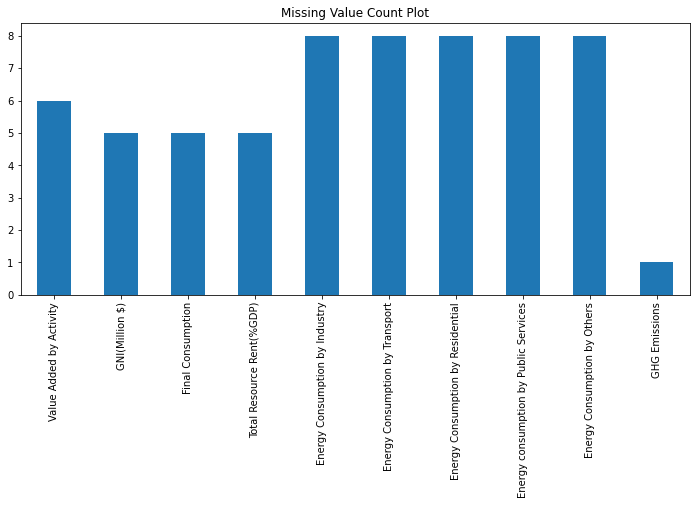

In [15]:
print(new_df.isnull().sum())
new_df.isna().sum()[new_df.isna().sum()>0].plot(kind='bar', figsize=(12,5), title='Missing Value Count Plot')

## Data Analysis ##

#### Energy consumption by source comparison ####

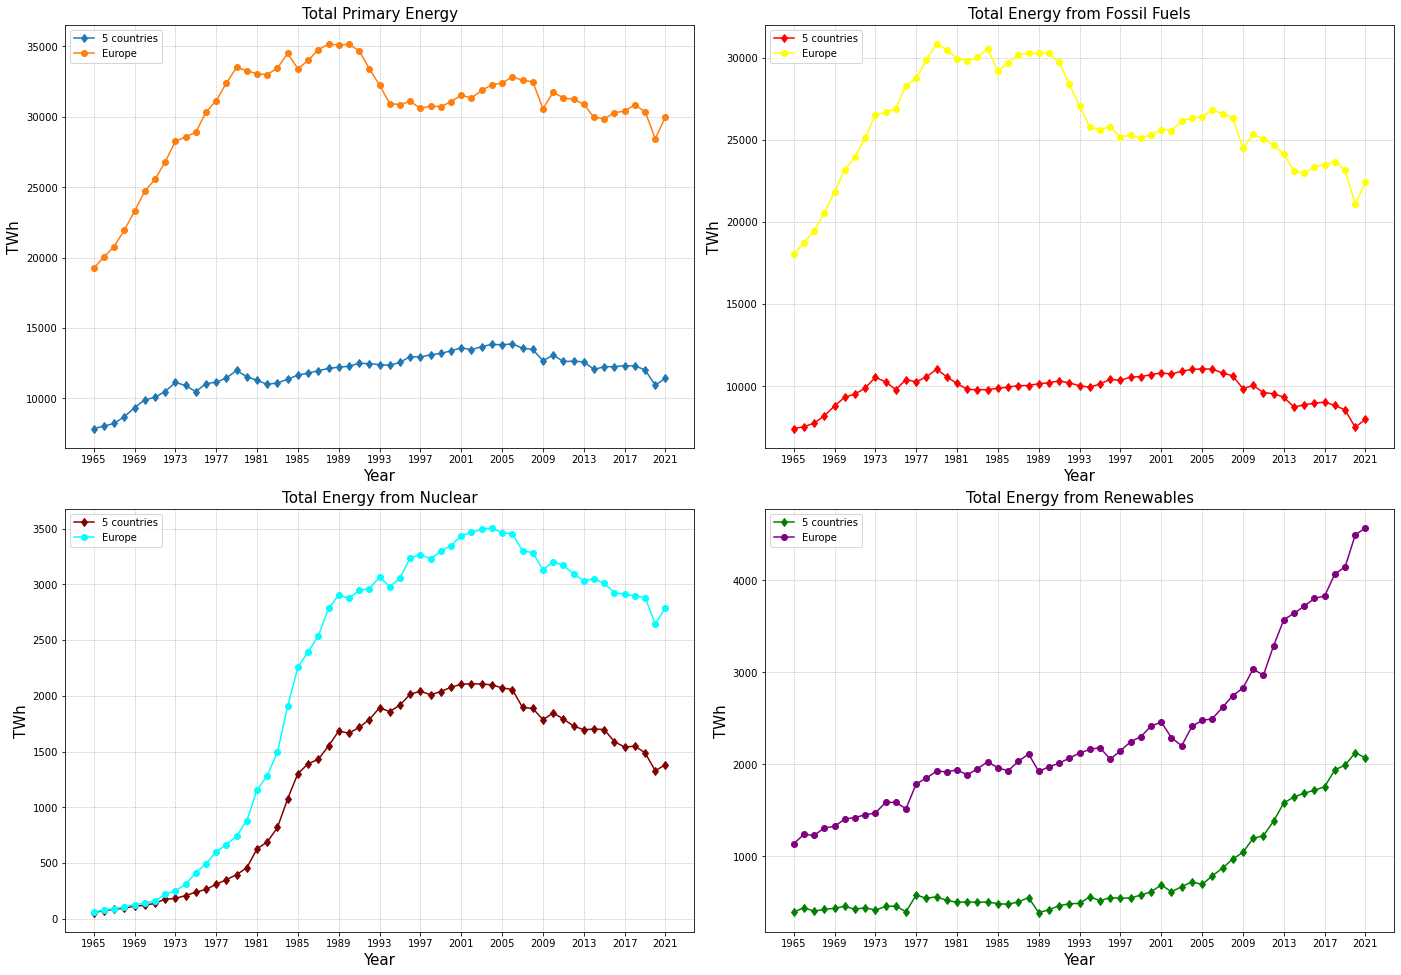

In [16]:
fig, ax = plt.subplots(2, 2,figsize=(20,14))
fig.tight_layout(pad=4.0)
ax[0,0].set_title('Total Primary Energy',fontsize=15)
ax[0,0].plot(new_df['Year'],new_df['Primary Energy'],marker='d',label='5 countries')
ax[0,0].plot(df_europe['year'],df_europe['Primary Energy'],marker='o',label='Europe')
ax[0,0].set_xticks(range(1965,2022,4))
ax[0,0].set_xlabel('Year',fontsize=15)
ax[0,0].set_ylabel('TWh',fontsize=15)
ax[0,0].grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax[0,0].legend(loc=2)

ax[0,1].set_title('Total Energy from Fossil Fuels',fontsize=15)
ax[0,1].plot(new_df['Year'],new_df['Fossil Consumption'],marker='d',label='5 countries',color='red')
ax[0,1].plot(df_europe['year'],df_europe['Fossil Consumption'],marker='o',label='Europe',color='yellow')
ax[0,1].set_xticks(range(1965,2022,4))
ax[0,1].set_xlabel('Year',fontsize=15)
ax[0,1].set_ylabel('TWh',fontsize=15)
ax[0,1].grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax[0,1].legend(loc=2)

ax[1,0].set_title('Total Energy from Nuclear',fontsize=15)
ax[1,0].plot(new_df['Year'],new_df['Nuclear Consumption'],marker='d',label='5 countries',color='maroon')
ax[1,0].plot(df_europe['year'],df_europe['Nuclear Consumption'],marker='o',label='Europe',color='cyan')
ax[1,0].set_xticks(range(1965,2022,4))
ax[1,0].set_xlabel('Year',fontsize=15)
ax[1,0].set_ylabel('TWh',fontsize=15)
ax[1,0].grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax[1,0].legend(loc=2)

ax[1,1].set_title('Total Energy from Renewables',fontsize=15)
ax[1,1].plot(new_df['Year'],new_df['Renewable Consumption'],marker='d',label='5 countries',color='green')
ax[1,1].plot(df_europe['year'],df_europe['Renewable Consumption'],marker='o',label='Europe',color='purple')
ax[1,1].set_xticks(range(1965,2022,4))
ax[1,1].set_xlabel('Year',fontsize=15)
ax[1,1].set_ylabel('TWh',fontsize=15)
ax[1,1].grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax[1,1].legend(loc=2)

#### Annual change in energy consumption ####

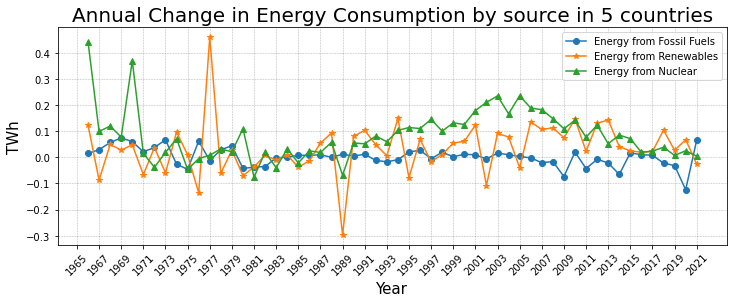

In [17]:
pe_pct_change=new_df[['Primary Energy', 'Fossil Consumption',
       'Total Coal Consumption', 'Total Gas Consumption',
       'Total Oil Consumption', 'Nuclear Consumption', 'Renewable Consumption',
       'Hydro Consumption', 'Solar Consumption', 'Wind Consumption',
       'Other Renewables']].pct_change()
pe_change_europe=df_europe[['Primary Energy', 'Fossil Consumption',
       'Total Coal Consumption', 'Total Gas Consumption',
       'Total Oil Consumption', 'Nuclear Consumption', 'Renewable Consumption',
       'Hydro Consumption', 'Solar Consumption', 'Wind Consumption',
       'Other Renewables']].pct_change()
plt.figure(figsize=(12,4))
plt.title('Annual Change in Energy Consumption by source in 5 countries',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(new_df['Year'],pe_pct_change['Fossil Consumption'],marker='o',label='Energy from Fossil Fuels')
plt.plot(new_df['Year'],pe_pct_change['Renewable Consumption'],marker='*',label="Energy from Renewables")
plt.plot(new_df['Year'],pe_pct_change['Other Renewables'],marker='^',label="Energy from Nuclear")
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=1)

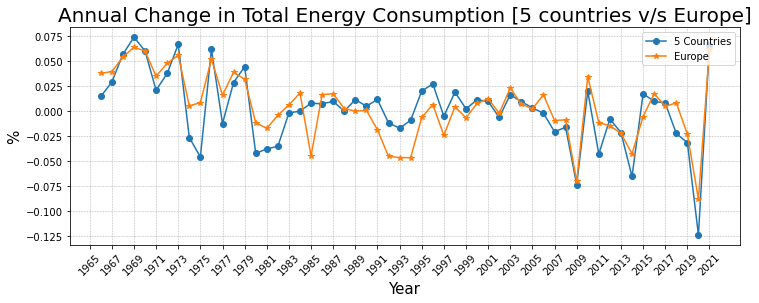

In [18]:
plt.figure(figsize=(12,4))
plt.title('Annual Change in Total Energy Consumption [5 countries v/s Europe]',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(new_df['Year'],pe_pct_change['Fossil Consumption'],marker='o',label='5 Countries')
plt.plot(new_df['Year'],pe_change_europe['Fossil Consumption'],marker='*',label="Europe")
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('%',fontsize=15)
plt.legend(loc=1)

#### Energy mix by source overall ####

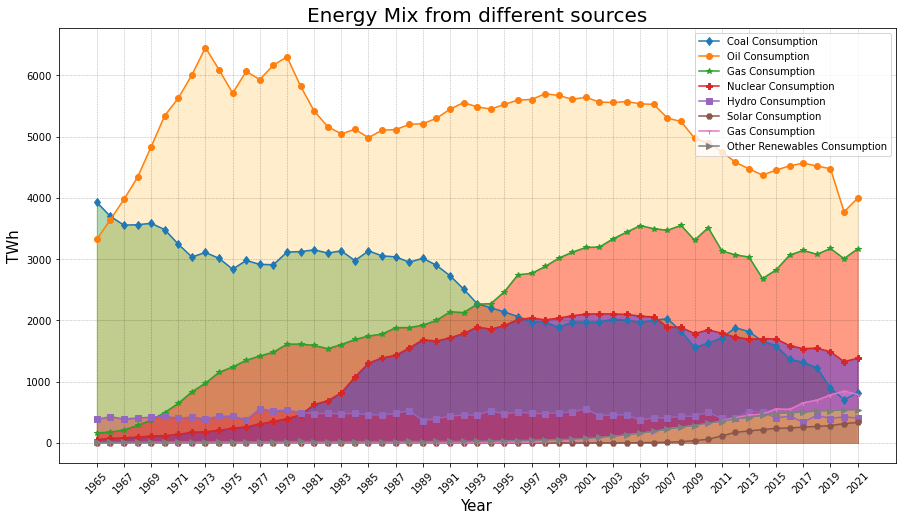

In [19]:
plt.figure(figsize=(15,8))
plt.title('Energy Mix from different sources',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(new_df['Year'],new_df['Total Coal Consumption'],marker='d',label='Coal Consumption')
plt.fill_between(new_df['Year'],new_df['Total Coal Consumption'],alpha=0.3,color='green')
plt.plot(new_df['Year'],new_df['Total Oil Consumption'],marker='o',label="Oil Consumption")
plt.fill_between(new_df['Year'],new_df['Total Oil Consumption'],alpha=0.2,color='orange')
plt.plot(new_df['Year'],new_df['Total Gas Consumption'],marker='*',label="Gas Consumption")
plt.fill_between(new_df['Year'],new_df['Total Gas Consumption'],alpha=0.35,color='red')
plt.plot(new_df['Year'],new_df['Nuclear Consumption'],marker='P',label="Nuclear Consumption")
plt.fill_between(new_df['Year'],new_df['Nuclear Consumption'],alpha=0.35,color='blue')
plt.plot(new_df['Year'],new_df['Hydro Consumption'],marker='s',label="Hydro Consumption")
plt.fill_between(new_df['Year'],new_df['Hydro Consumption'],alpha=0.35,color='crimson')
plt.plot(new_df['Year'],new_df['Solar Consumption'],marker='H',label="Solar Consumption")
plt.fill_between(new_df['Year'],new_df['Solar Consumption'],alpha=0.35,color='indigo')
plt.plot(new_df['Year'],new_df['Wind Consumption'],marker='1',label="Gas Consumption")
plt.fill_between(new_df['Year'],new_df['Wind Consumption'],alpha=0.35,color='violet')
plt.plot(new_df['Year'],new_df['Other Renewables'],marker='>',label="Other Renewables Consumption")
plt.fill_between(new_df['Year'],new_df['Other Renewables'],alpha=0.35,color='yellow')
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=1)

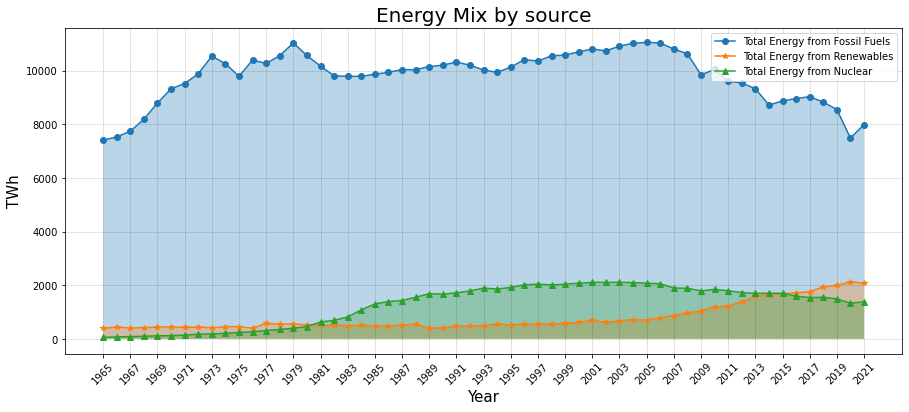

In [20]:
plt.figure(figsize=(15,6))
plt.title('Energy Mix by source',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)

plt.plot(new_df['Year'],new_df['Fossil Consumption'],marker='o',label='Total Energy from Fossil Fuels')
plt.fill_between(new_df['Year'],new_df['Fossil Consumption'],alpha=0.3)
plt.plot(new_df['Year'],new_df['Renewable Consumption'],marker='*',label="Total Energy from Renewables")
plt.fill_between(new_df['Year'],new_df['Renewable Consumption'],alpha=0.3)
plt.plot(new_df['Year'],new_df['Nuclear Consumption'],marker='^',label="Total Energy from Nuclear")
plt.fill_between(new_df['Year'],new_df['Nuclear Consumption'],alpha=0.3)
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=1)

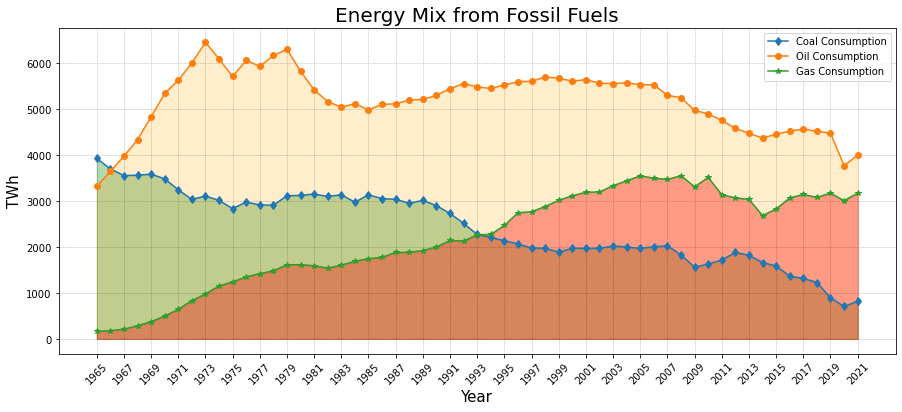

In [21]:
plt.figure(figsize=(15,6))
plt.title('Energy Mix from Fossil Fuels',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(new_df['Year'],new_df['Total Coal Consumption'],marker='d',label='Coal Consumption')
plt.fill_between(new_df['Year'],new_df['Total Coal Consumption'],alpha=0.3,color='green')
plt.plot(new_df['Year'],new_df['Total Oil Consumption'],marker='o',label="Oil Consumption")
plt.fill_between(new_df['Year'],new_df['Total Oil Consumption'],alpha=0.2,color='orange')
plt.plot(new_df['Year'],new_df['Total Gas Consumption'],marker='*',label="Gas Consumption")
plt.fill_between(new_df['Year'],new_df['Total Gas Consumption'],alpha=0.35,color='red')
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=1)

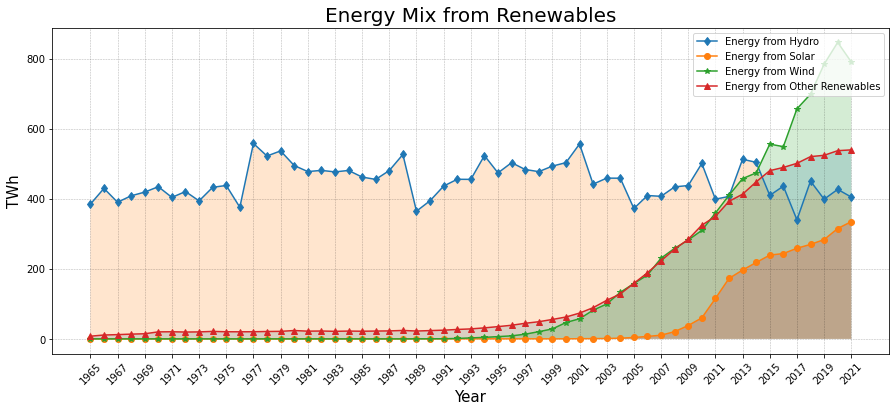

In [22]:
plt.figure(figsize=(15,6))
plt.title('Energy Mix from Renewables',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(new_df['Year'],new_df['Hydro Consumption'],marker='d',label='Energy from Hydro')
plt.plot(new_df['Year'],new_df['Solar Consumption'],marker='o',label="Energy from Solar")
plt.plot(new_df['Year'],new_df['Wind Consumption'],marker='*',label="Energy from Wind")
plt.plot(new_df['Year'],new_df['Other Renewables'],marker='^',label="Energy from Other Renewables")
plt.fill_between(new_df['Year'],new_df['Other Renewables'],alpha=0.2)
plt.fill_between(new_df['Year'],new_df['Hydro Consumption'],alpha=0.2)
plt.fill_between(new_df['Year'],new_df['Wind Consumption'],alpha=0.2)
plt.fill_between(new_df['Year'],new_df['Solar Consumption'],alpha=0.2)
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=1)

#### Consumption of energy by different sectors ####

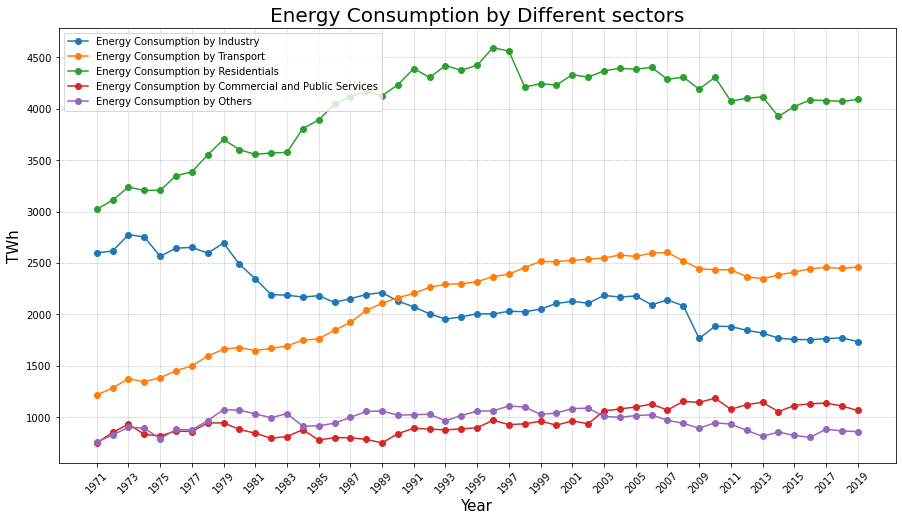

In [23]:
plt.figure(figsize=(15,8))
plt.title('Energy Consumption by Different sectors',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(new_df['Year'],new_df['Energy Consumption by Industry']/3.6,marker="o",label="Energy Consumption by Industry")
plt.plot(new_df['Year'],new_df['Energy Consumption by Transport']/3.6,marker="o",label="Energy Consumption by Transport")
plt.plot(new_df['Year'],new_df['Energy Consumption by Residential']/3.6,marker="o",label="Energy Consumption by Residentials")
plt.plot(new_df['Year'],new_df['Energy consumption by Public Services']/3.6,marker="o",label="Energy Consumption by Commercial and Public Services")
plt.plot(new_df['Year'],new_df['Energy Consumption by Others']/3.6,marker="o",label="Energy Consumption by Others")
plt.xticks(range(1971,2021,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=0)

#### Green House Gases Emissions analysis, insights and comparison ####

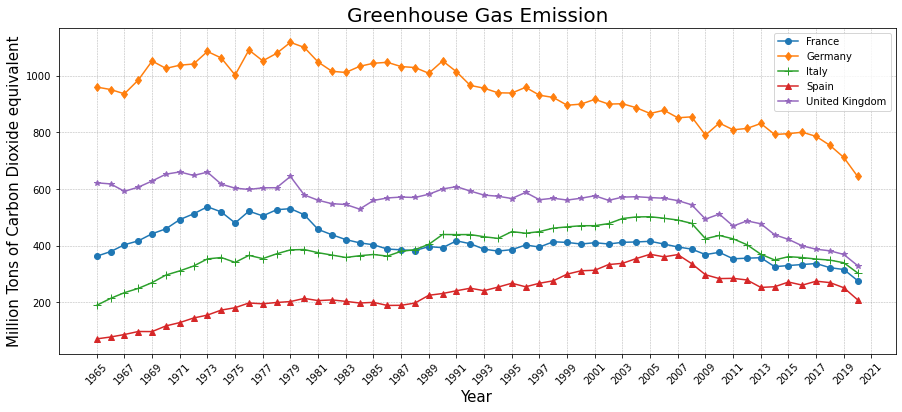

In [24]:
plt.figure(figsize=(15,6))
plt.title('Greenhouse Gas Emission',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(df_5_ghg['Year'],df_5_ghg['France'],marker="o",label="France")
plt.plot(df_5_ghg['Year'],df_5_ghg['Germany'],marker="d",label="Germany")
plt.plot(df_5_ghg['Year'],df_5_ghg['Italy'],marker="+",markersize=8,label="Italy")
plt.plot(df_5_ghg['Year'],df_5_ghg['Spain'],marker="^",label="Spain")
plt.plot(df_5_ghg['Year'],df_5_ghg['United Kingdom'],marker="*",label="United Kingdom")
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Million Tons of Carbon Dioxide equivalent',fontsize=15)
plt.legend(loc=0)

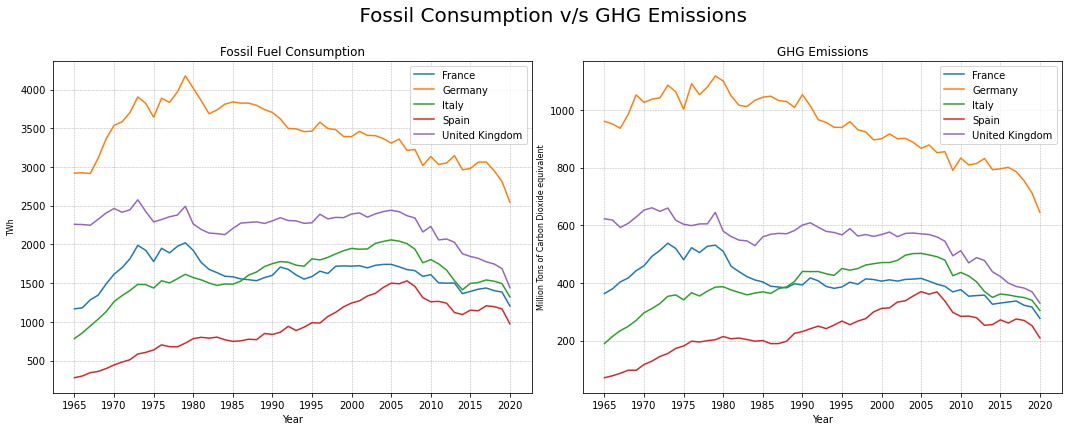

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.tight_layout(pad=12.0)
fig.suptitle(' Fossil Consumption v/s GHG Emissions', fontsize=20)
fig.tight_layout(pad=2.0)
ax1.set_title('Fossil Fuel Consumption')
ax1.plot(df_5_ghg['Year'],df_5_ghg['france_fossil'],label='France')
ax1.plot(df_5_ghg['Year'],df_5_ghg['germany_fossil'],label='Germany')
ax1.plot(df_5_ghg['Year'],df_5_ghg['italy_fossil'],label='Italy')
ax1.plot(df_5_ghg['Year'],df_5_ghg['spain_fossil'],label='Spain')
ax1.plot(df_5_ghg['Year'],df_5_ghg['uk_fossil'],label='United Kingdom')
ax1.set_xticks(range(1965,2022,5))
ax1.set_xlabel('Year')
ax1.set_ylabel('TWh',fontsize=8)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax1.legend(loc=1)

ax2.set_title('GHG Emissions')
ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax2.plot(df_5_ghg['Year'],df_5_ghg['France'],label="France")
ax2.plot(df_5_ghg['Year'],df_5_ghg['Germany'],label="Germany")
ax2.plot(df_5_ghg['Year'],df_5_ghg['Italy'],markersize=8,label="Italy")
ax2.plot(df_5_ghg['Year'],df_5_ghg['Spain'],label="Spain")
ax2.plot(df_5_ghg['Year'],df_5_ghg['United Kingdom'],label="United Kingdom")
ax2.set_xticks(range(1965,2022,5))
ax2.set_xlabel('Year',fontsize=10)
ax2.set_ylabel('Million Tons of Carbon Dioxide equivalent',fontsize=8)
ax2.legend(loc=0)

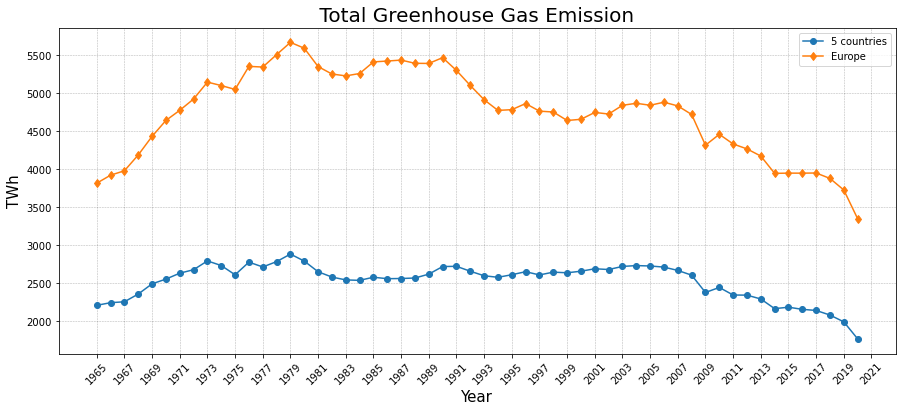

In [26]:
plt.figure(figsize=(15,6))
plt.title(' Total Greenhouse Gas Emission ',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.plot(df_5_ghg['Year'],df_5_ghg['Total_emission'],marker="o",label="5 countries")
plt.plot(df_europe_ghg['Year'],df_europe_ghg['Total'],marker="d",label="Europe")
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('TWh',fontsize=15)
plt.legend(loc=1)

In [27]:
europe_emission=['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovakia', 'Slovenia', 'Sweden', 'Switzerland', 'Ukraine']

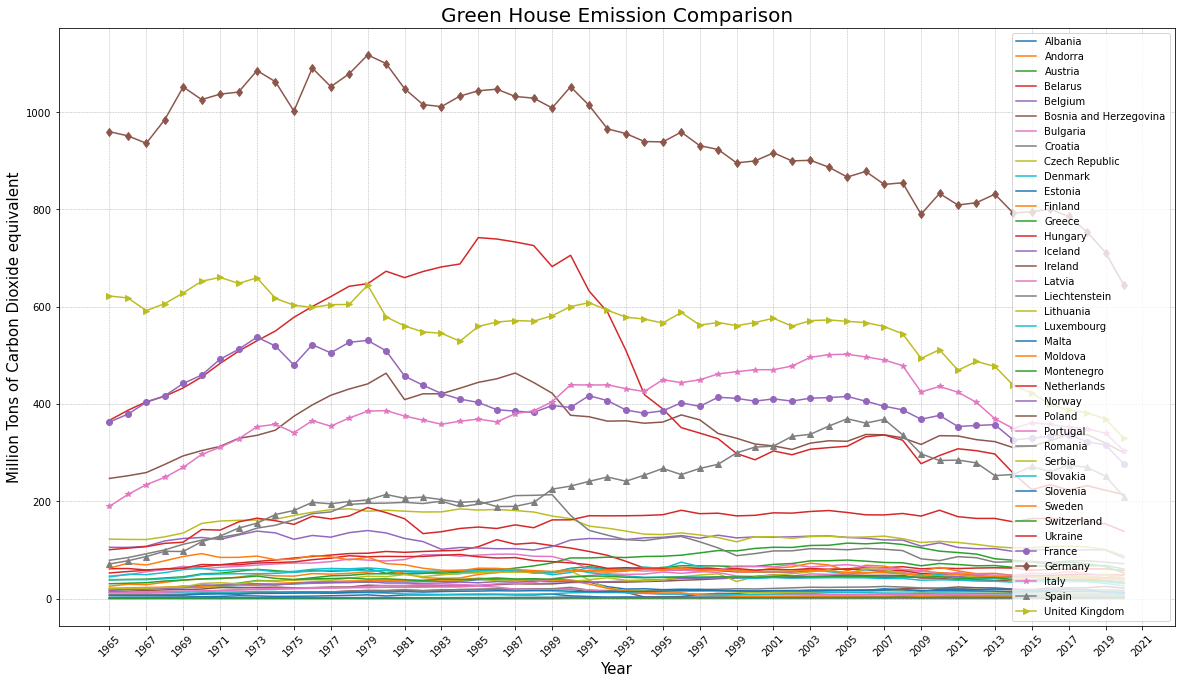

In [28]:
plt.figure(figsize=(20,11))
plt.title('Green House Emission Comparison',fontsize=20)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.xticks(range(1965,2022,2),rotation=45)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Million Tons of Carbon Dioxide equivalent',fontsize=15)
for i in europe_emission:
    plt.plot(df_europe_ghg['Year'],df_europe_ghg[i],label=i)
    plt.legend(loc=1)
plt.plot(df_5_ghg['Year'],df_5_ghg['France'],marker='o',label='France')
plt.plot(df_5_ghg['Year'],df_5_ghg['Germany'],marker='d',label='Germany')
plt.plot(df_5_ghg['Year'],df_5_ghg['Italy'],marker='*',label='Italy')
plt.plot(df_5_ghg['Year'],df_5_ghg['Spain'],marker='^',label='Spain')
plt.plot(df_5_ghg['Year'],df_5_ghg['United Kingdom'],marker='>',label='United Kingdom')
plt.legend(loc=1)

#### Energy consumption vis a vis GHG emission ####

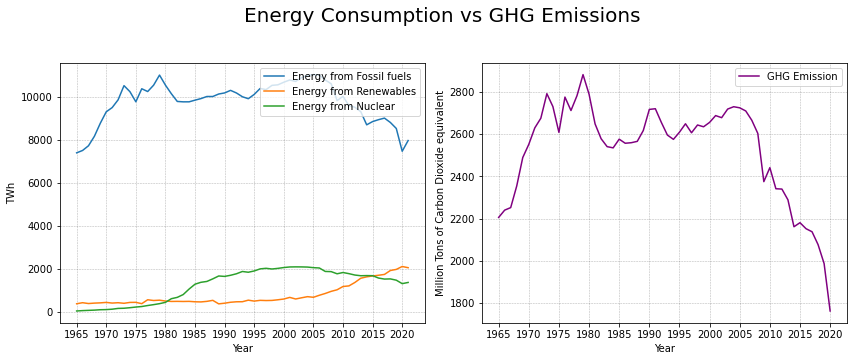

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(pad=12.0)
fig.suptitle('Energy Consumption vs GHG Emissions', fontsize=20)
fig.tight_layout(pad=2.0)
ax1.plot(new_df['Year'],new_df['Fossil Consumption'],label='Energy from Fossil fuels')
ax1.plot(new_df['Year'],new_df['Renewable Consumption'],label='Energy from Renewables')
ax1.plot(new_df['Year'],new_df['Nuclear Consumption'],label='Energy from Nuclear')
ax1.set_xticks(range(1965,2022,5))
ax1.set_xlabel('Year')
ax1.set_ylabel('TWh')
ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax1.legend(loc=1)
ax2.plot(df_5_ghg['Year'],df_5_ghg['Total_emission'],color='purple',label='GHG Emission')
ax2.set_xticks(range(1965,2022,5))
ax2.set_xlabel('Year')
ax2.set_ylabel('Million Tons of Carbon Dioxide equivalent')
ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5,alpha=0.3)
ax2.legend(loc=0)

#### Data distribution ####

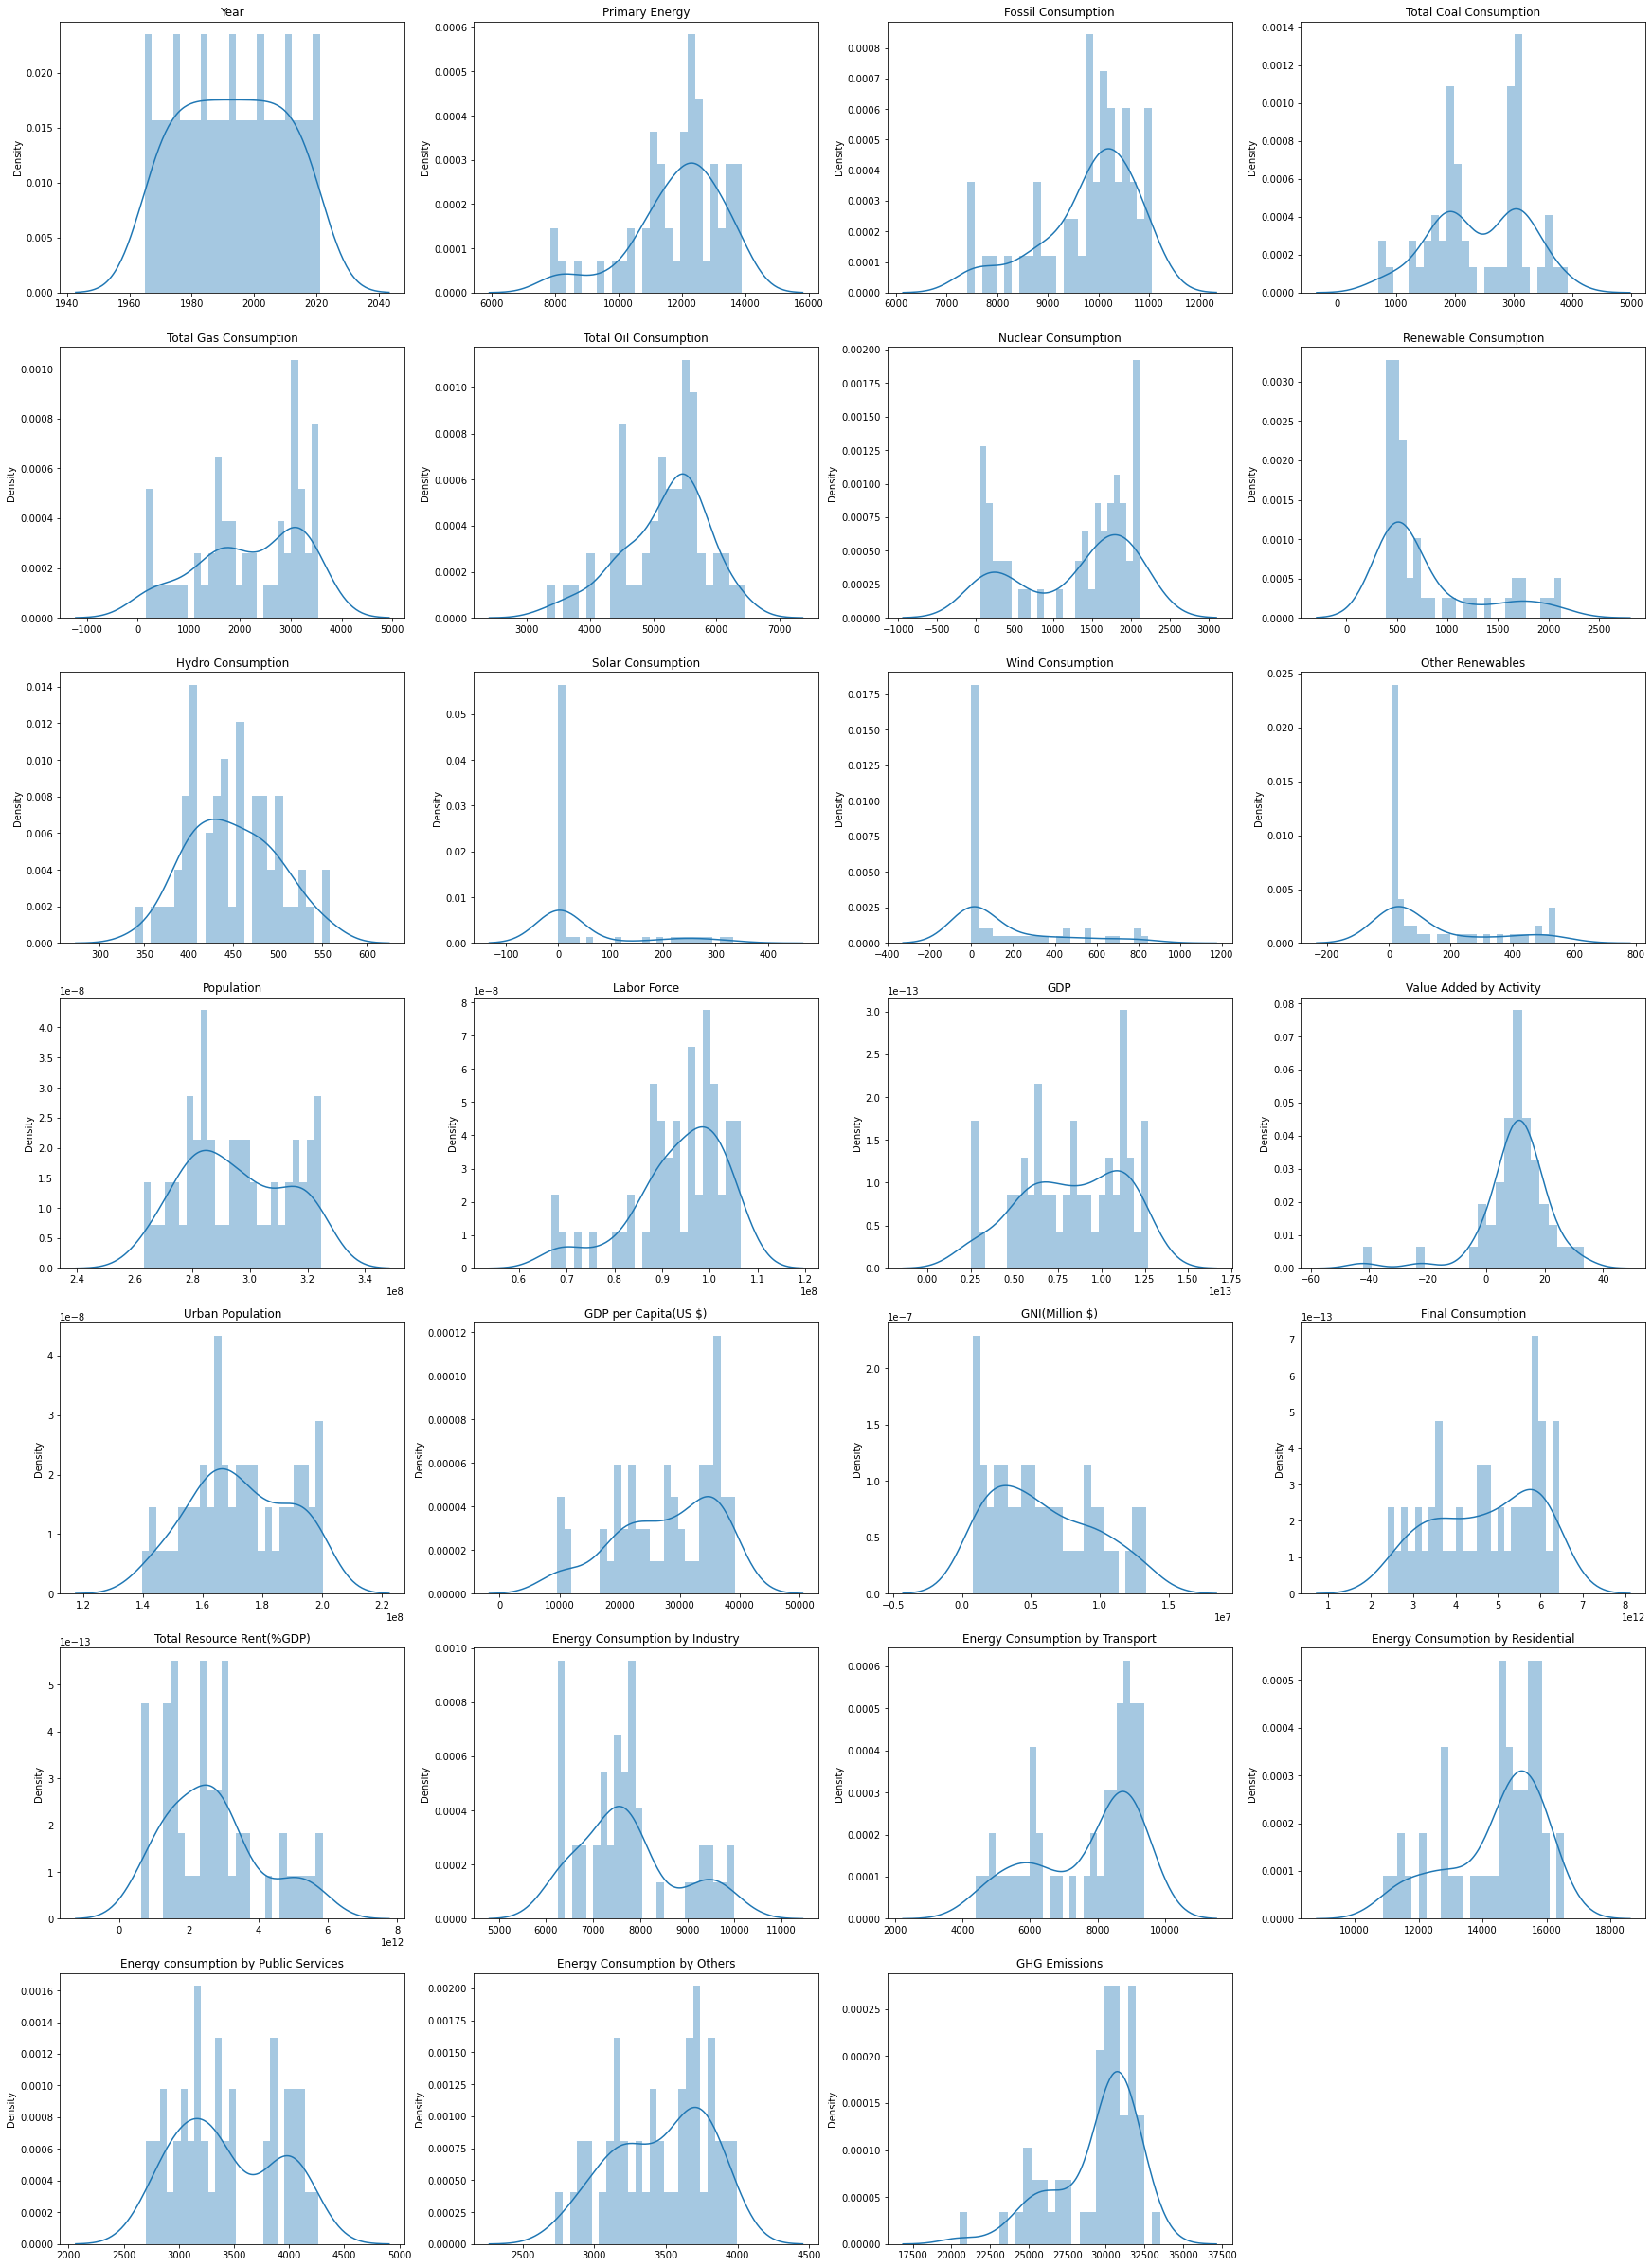

In [30]:
count=1
plt.subplots(figsize=(30, 100))
fig.tight_layout(pad=12.0)
fig.subplots_adjust(hspace=20)
for i in new_df.columns:
    plt.subplot(16,4,count)
    sns.distplot(new_df[i], bins=25)
    plt.xlabel('',fontsize=13)
    plt.title(i)
    count+=1
plt.show()

<AxesSubplot:title={'center':'Skewness'}>

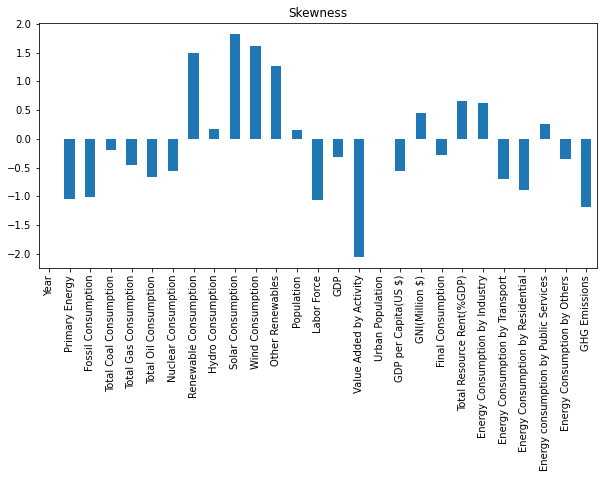

In [31]:
plt.figure(figsize=(10,4.5))
new_df.skew().plot(kind='bar', title="Skewness")

### Outliers detection ###

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Year'),
  Text(1, 0, 'Primary Energy'),
  Text(2, 0, 'Fossil Consumption'),
  Text(3, 0, 'Total Coal Consumption'),
  Text(4, 0, 'Total Gas Consumption'),
  Text(5, 0, 'Total Oil Consumption'),
  Text(6, 0, 'Nuclear Consumption'),
  Text(7, 0, 'Renewable Consumption'),
  Text(8, 0, 'Hydro Consumption'),
  Text(9, 0, 'Solar Consumption'),
  Text(10, 0, 'Wind Consumption'),
  Text(11, 0, 'Other Renewables'),
  Text(12, 0, 'Population'),
  Text(13, 0, 'Labor Force'),
  Text(14, 0, 'GDP'),
  Text(15, 0, 'Value Added by Activity'),
  Text(16, 0, 'Urban Population'),
  Text(17, 0, 'GDP per Capita(US $)'),
  Text(18, 0, 'GNI(Million $)'),
  Text(19, 0, 'Final Consumption'),
  Text(20, 0, 'Total Resource Rent(%GDP)'),
  Text(21, 0, 'Energy Consumption by Industry'),
  Text(22, 0, 'Energy Consumption by Transport'),
  Text(23, 0, 'Energy Consumption by Resi

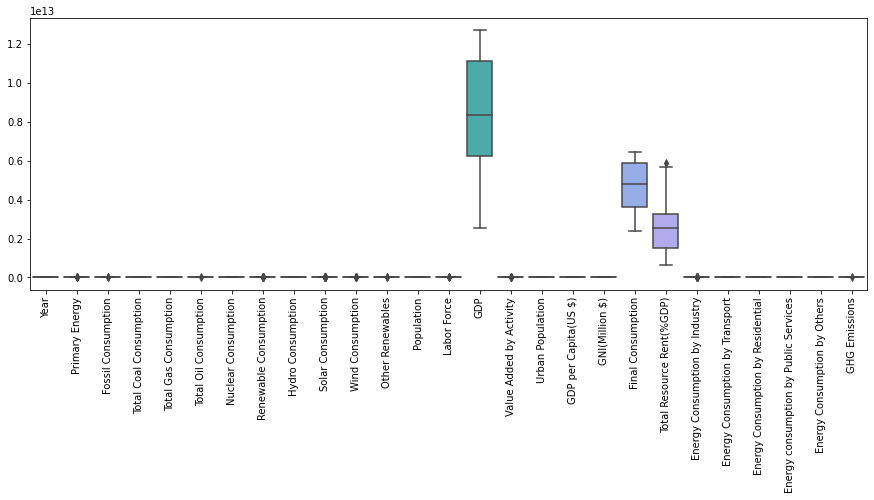

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(data=new_df)
plt.xticks(rotation=90)

In [33]:
#defining a function to count number of outliers
def find_outliers_IQR(new_df): 

    q1=new_df.quantile(0.25) #lower quartile

    q3=new_df.quantile(0.75) #lower quartile

    IQR=q3-q1 #inter quartile range

    outliers = new_df[((new_df<(q1-1.5*IQR)) | (new_df>(q3+1.5*IQR)))] 

    return outliers

Number of outliers in  Year :0
Number of outliers in  Primary Energy :4
Number of outliers in  Fossil Consumption :2
Number of outliers in  Total Coal Consumption :0
Number of outliers in  Total Gas Consumption :0
Number of outliers in  Total Oil Consumption :1
Number of outliers in  Nuclear Consumption :0
Number of outliers in  Renewable Consumption :9
Number of outliers in  Hydro Consumption :0
Number of outliers in  Solar Consumption :13
Number of outliers in  Wind Consumption :5
Number of outliers in  Other Renewables :2
Number of outliers in  Population :0
Number of outliers in  Labor Force :3
Number of outliers in  GDP :0
Number of outliers in  Value Added by Activity :4
Number of outliers in  Urban Population :0
Number of outliers in  GDP per Capita(US $) :0
Number of outliers in  GNI(Million $) :0
Number of outliers in  Final Consumption :0
Number of outliers in  Total Resource Rent(%GDP) :1
Number of outliers in  Energy Consumption by Industry :9
Number of outliers in  Energy 

Text(0.5, 0, 'Features')

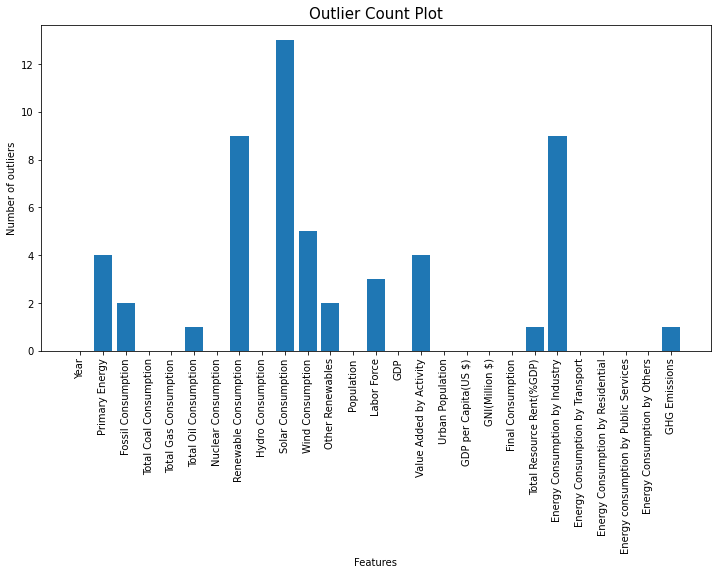

In [34]:
outlier=[] #list to store number of outliers in each feature
for i in new_df.columns:
    print('Number of outliers in ',i,':' +str(len(find_outliers_IQR(new_df[i]))))
    outlier.append(len(find_outliers_IQR(new_df[i])))
plt.figure(figsize=(12,6))    
plt.bar(new_df.columns,outlier)
plt.xticks(rotation=90)
plt.title('Outlier Count Plot',fontsize=15)
plt.ylabel('Number of outliers')
plt.xlabel('Features')

# Data Preprocessing #

In [35]:
# Filling the Null Values
new_df = new_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [36]:
print('\t\t\t\t The null values are handled')
print("   ")
print(new_df.isna().sum())

				 The null values are handled
   
Year                                     0
Primary Energy                           0
Fossil Consumption                       0
Total Coal Consumption                   0
Total Gas Consumption                    0
Total Oil Consumption                    0
Nuclear Consumption                      0
Renewable Consumption                    0
Hydro Consumption                        0
Solar Consumption                        0
Wind Consumption                         0
Other Renewables                         0
Population                               0
Labor Force                              0
GDP                                      0
Value Added by Activity                  0
Urban Population                         0
GDP per Capita(US $)                     0
GNI(Million $)                           0
Final Consumption                        0
Total Resource Rent(%GDP)                0
Energy Consumption by Industry           0
Energy Consumptio

### Normalisation ###

In [37]:
#function to define function to normalise the data
def normalize_dataset(data):
    min_max_scaler = preprocessing.StandardScaler()
    X_train_minmax = min_max_scaler.fit_transform(data)
    return X_train_minmax

### Correlation Matrix ###

In [38]:
#Plotting the correlation matrix of dependent and independent variables
selected_df = new_df[['Year', 'Primary Energy', 'Fossil Consumption', 'Nuclear Consumption', 'Renewable Consumption',
                  'Population', 'Labor Force', 'GDP','Value Added by Activity', 
                   'Urban Population', 'GDP per Capita(US $)',
                   'GNI(Million $)', 'Final Consumption', 'Total Resource Rent(%GDP)','GHG Emissions','Energy Consumption by Industry', 'Energy Consumption by Transport',
       'Energy Consumption by Residential', 'Energy consumption by Public Services',
       'Energy Consumption by Others']]
selected_df.head()

,Year,Primary Energy,Fossil Consumption,Nuclear Consumption,Renewable Consumption,Population,Labor Force,GDP,Value Added by Activity,Urban Population,GDP per Capita(US $),GNI(Million $),Final Consumption,Total Resource Rent(%GDP),GHG Emissions,Energy Consumption by Industry,Energy Consumption by Transport,Energy Consumption by Residential,Energy consumption by Public Services,Energy Consumption by Others
0,1965,7861.043,7413.145,55.783,392.115,263223824,66865059,2.520000e+12,11.561095,139522906,9573.60,5.144546e+06,4.780000e+12,2.525000e+12,25652.5236,7623.84738,8349.865001,14822.76742,3361.870957,3494.869373
1,1966,8035.925,7522.357,73.037,440.531,265220195,68033468,2.630000e+12,11.561095,141988258,9916.29,5.144546e+06,4.780000e+12,2.525000e+12,26053.5260,7623.84738,8349.865001,14822.76742,3361.870957,3494.869373
2,1967,8228.336,7741.817,84.360,402.162,267061434,69334211,2.760000e+12,11.561095,144272343,10334.70,5.144546e+06,4.780000e+12,2.525000e+12,26193.4349,7623.84738,8349.865001,14822.76742,3361.870957,3494.869373
3,1968,8701.398,8183.842,95.625,421.932,268841039,72224597,2.910000e+12,11.561095,146409445,10824.24,5.144546e+06,4.780000e+12,2.525000e+12,27381.9046,7623.84738,8349.865001,14822.76742,3361.870957,3494.869373
4,1969,9339.040,8791.516,113.983,433.542,270740514,76257682,3.060000e+12,11.561095,148408215,11302.34,5.144546e+06,4.780000e+12,2.525000e+12,28946.7211,7623.84738,8349.865001,14822.76742,3361.870957,3494.869373


In [39]:
df = selected_df.copy()
df.describe()

,Year,Primary Energy,Fossil Consumption,Nuclear Consumption,Renewable Consumption,Population,Labor Force,GDP,Value Added by Activity,Urban Population,GDP per Capita(US $),GNI(Million $),Final Consumption,Total Resource Rent(%GDP),GHG Emissions,Energy Consumption by Industry,Energy Consumption by Transport,Energy Consumption by Residential,Energy consumption by Public Services,Energy Consumption by Others
count,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,5.700000e+01,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1993.000000,11852.282404,9797.159825,1268.365123,786.757316,2.950393e+08,9.348487e+07,8.311754e+12,10.203635,1.725904e+08,27692.484737,5.766262e+06,4.704386e+12,2.682123e+12,29393.819107,7725.157124,7730.663613,14467.372853,3423.401961,3468.142314
std,16.598193,1450.868962,955.455045,745.881112,508.123589,1.774203e+07,9.772914e+06,2.928201e+12,10.949249,1.657594e+07,8446.627581,3.575213e+06,1.168817e+12,1.331396e+12,2692.213453,975.725083,1462.725223,1394.261198,429.809767,310.182448
min,1965.000000,7861.043000,7413.145000,55.783000,387.042000,2.632238e+08,6.686506e+07,2.520000e+12,-42.133085,1.395229e+08,9573.600000,7.995561e+05,2.390000e+12,6.380000e+11,20506.597500,6249.688047,4378.529234,10877.445860,2701.873422,2729.761094
25%,1979.000000,11135.444000,9328.082000,396.287000,461.437000,2.815794e+08,8.845694e+07,6.220000e+12,7.535455,1.612081e+08,22089.690000,2.854796e+06,3.670000e+12,1.620000e+12,27620.552200,7221.095917,6348.691216,14013.672860,3116.522379,3218.824966
50%,1993.000000,12220.305000,10033.245000,1550.029000,547.078000,2.940192e+08,9.563277e+07,8.360000e+12,11.561095,1.714823e+08,28545.500000,5.144546e+06,4.780000e+12,2.525000e+12,30291.265400,7623.847380,8349.865001,14822.767420,3361.870957,3494.869373
75%,2007.000000,12670.890000,10538.556000,1886.709000,870.650000,3.113590e+08,1.003009e+08,1.110000e+13,14.784540,1.874099e+08,35477.680000,8.686409e+06,5.860000e+12,3.070000e+12,31139.441300,7877.126207,8804.058649,15499.945040,3838.096639,3701.782005
max,2021.000000,13872.189000,11051.523000,2107.585000,2125.316000,3.246362e+08,1.064027e+08,1.270000e+13,33.350184,2.001604e+08,39187.820000,1.338402e+07,6.450000e+12,5.870000e+12,33507.774500,9995.374577,9372.611749,16547.172380,4268.543502,3992.916757


[Text(0.5, 1.0, 'Correlation matrix of Dataset')]

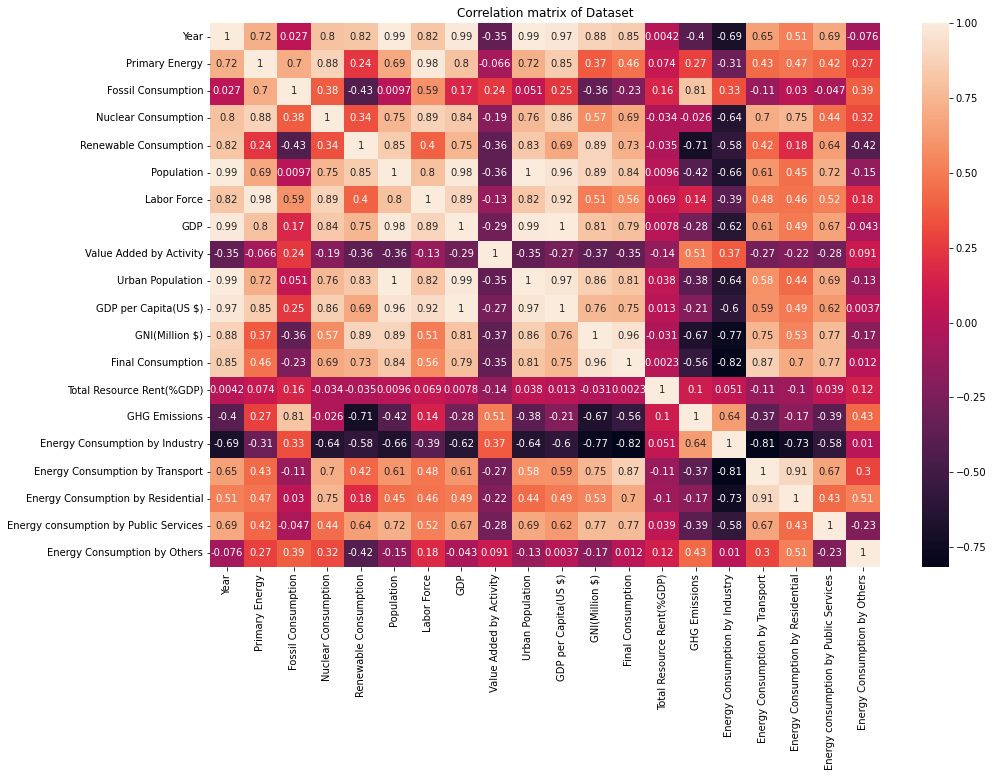

In [40]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot=True)
ax.set(title = "Correlation matrix of Dataset")

#### As we can see, there is a strong positive correlation among few features.

# Training Models #

In [41]:
#creating a dataframe of independent features
independent_columns = ['Population', 'Labor Force', 'GDP',
       'Value Added by Activity', 'Urban Population', 'GDP per Capita(US $)',
       'GNI(Million $)', 'Final Consumption', 'Total Resource Rent(%GDP)','Energy Consumption by Industry', 'Energy Consumption by Transport',
       'Energy Consumption by Residential', 'Energy consumption by Public Services',
       'Energy Consumption by Others']
X = df[independent_columns]

Here, I am defining different functions to run the code effectively and in minimum possible time

In [42]:
def get_data_prepared_for_different_models(target_column):
    print('#'*50)
    print(f'The Target Variable is {target_column}')
    
    X = df[independent_columns]
    y = df[[target_column]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
#     print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    X_train_minmax = normalize_dataset(X_train)
    X_test_minmax = normalize_dataset(X_test)
    print('#'*50)
    return X_train_minmax, X_test_minmax, y_train, y_test

In [43]:
#defining a fucntion to select best features
def select_best_features(num_of_features=7, X_train=None, X_test=None, y_train=None, y_test=None):
    print('\n')
    print(f'Selecting the {num_of_features} Best Features for the model Training.\n')
    selected_features = SelectKBest(score_func=f_regression, k=num_of_features)
    selected_features.fit(X_train, y_train)
    X_train_fs = selected_features.transform(X_train)
    X_test_fs = selected_features.transform(X_test)
    
    kept_features = pd.DataFrame({'IndependentColumns': X.columns,
                              'KeepColumns': selected_features.get_support()})
    print(kept_features, '\n')
    training_features = list(kept_features.loc[kept_features.KeepColumns==True].IndependentColumns)
    print('The selected Features are ==>', training_features)
    return X_train_fs, X_test_fs, training_features

In [44]:
def get_ajusted_r2(model=None, X_test=None, y_test=None):
    """
    This function calculates and return the Adjusted R2 of the model.
    """
    
    return 1 - (1 - model.score(X_test, y_test) ) * (len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [45]:
#Defining list of models to be used
model_list = {"RandomForestRegressor": RandomForestRegressor(random_state=10),
            "AdaBoostRegressor": AdaBoostRegressor(random_state=10),
            "LinearRegression": LinearRegression(),
            "Ridge": Ridge(random_state=10),
            "Lasso": Lasso(random_state=10),
            "SGDRegressor": SGDRegressor(random_state=10),
            "GradientBoostingRegressor": GradientBoostingRegressor(),
            "XGBRegressor": XGBRegressor(random_state=10)}

In [46]:
def train_regressor_and_get_result(X_train, X_test, y_train, y_test):
    
    """
    This functions trains the regression model on the training dataset and calculates the model score (R2 R square)
    for each regressor. We can add more regression algorithms in models list declared inside the
    function.
    The function returns a pandas dataframe showing the regression algorithm and their performance on the validation
    dataset.
    
    """
    
    final_r2_list = list()

    for name, model in model_list.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        meanSquaredError = mean_squared_error(y_test, y_pred)
        adjusted_r2 = get_ajusted_r2(model=model, X_test=X_test, y_test=y_test)
        

        final_r2_list.append((name, r2))
        
    columns=['Regressor', 'R2_Score']
    r2_dataframe = pd.DataFrame(final_r2_list, columns=columns)
    sorted_df = r2_dataframe.sort_values(by='R2_Score', ascending=False).head(10)
    
    return sorted_df

In [47]:
#defining function to plot the model performance
def plot_regressor_performance_plot(r2_df=None, title_column=None):
    fig, ax1 = plt.subplots(figsize=(7, 4.5))
    melted_df = r2_df[['Regressor', 'R2_Score']].melt(id_vars='Regressor').rename(columns=str.title)
    plt.title(f'Regressor Performance Comparison for {title_column}', fontdict={'fontsize':10,
            'fontweight':50})
    plt.xticks(rotation=90)
    ax1.set_xlabel(ax1.get_xlabel(), fontdict={'weight': 'bold', 'size':10})
    ax1.set_ylabel(ax1.get_ylabel(), fontdict={'weight': 'bold', 'size':10})
    final_plot = sns.barplot(x='Regressor', y='Value', hue='Variable', data=melted_df, ax=ax1)
    plt.show()

In [48]:
#defining function to find the best model
def train_topBest_model(r2_dataframe=None, X_train=None, X_test=None, y_train=None, y_test=None, training_features=None):
        
    top_model_selected = r2_dataframe.head(1).Regressor.values[0]    
    model = model_list.get(top_model_selected)
    
    print('The Best Performing Regression Model is==>', top_model_selected)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Y_pred', y_pred.flatten())
    print('Y_test', y_test.values.flatten())
    ploting_df = pd.DataFrame({'ActualValues':y_test.values.flatten(), 'PredictedValues':y_pred.flatten()})

    true_value = ploting_df['ActualValues']
    predicted_value = ploting_df['PredictedValues']
    plt.figure(figsize=(7,7))
    plt.scatter(true_value, predicted_value, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    
    print('\n')

    if top_model_selected in ["RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor", "XGBRegressor"]:
        importances = model.feature_importances_
        indices = np.argsort(importances)
        plt.figure(figsize=(7,4.5))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='g', align='center')
        plt.yticks(range(len(indices)), [training_features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
        return model
    
    else:
        importances = pd.DataFrame(data={
        'Attribute': training_features,
        'Importance': model.coef_.flatten()})

        importances = importances.sort_values(by='Importance', ascending=False)
        print(importances)

        print('\n')

        plt.figure(figsize=(7,4.5))
        plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#089E8B')
        plt.title('Feature importances obtained from coefficients', size=10)
        plt.xticks(rotation=90)
        plt.show()
    
    return model

<p> Checking again for null values as they are not suitable for machine learning and can not be read and understand by different algorithms</p>

In [49]:
X.isnull().sum()

Population                               0
Labor Force                              0
GDP                                      0
Value Added by Activity                  0
Urban Population                         0
GDP per Capita(US $)                     0
GNI(Million $)                           0
Final Consumption                        0
Total Resource Rent(%GDP)                0
Energy Consumption by Industry           0
Energy Consumption by Transport          0
Energy Consumption by Residential        0
Energy consumption by Public Services    0
Energy Consumption by Others             0
dtype: int64

## Training Regression Model for 'Primary Energy'

<p><b>Here, we select the best 7 features out of the available 12 features and find out which features of the selected 7 affect the target variable the most in further steps. This is done to reduce training time and model complexity.</b> </p>

<b>This step is repeated for every target variable</b>

<p><b>Note: </b>In case the code again shows an error in any of the further steps, please rerun the code from this step</p>

In [50]:
X_train, X_test, y_train, y_test = get_data_prepared_for_different_models('Primary Energy')
X_train_fs, X_test_fs, training_features = select_best_features(num_of_features=7, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

##################################################
The Target Variable is Primary Energy
##################################################


Selecting the 7 Best Features for the model Training.

                       IndependentColumns  KeepColumns
0                              Population         True
1                             Labor Force         True
2                                     GDP         True
3                 Value Added by Activity        False
4                        Urban Population         True
5                    GDP per Capita(US $)         True
6                          GNI(Million $)        False
7                       Final Consumption        False
8               Total Resource Rent(%GDP)        False
9          Energy Consumption by Industry        False
10        Energy Consumption by Transport         True
11      Energy Consumption by Residential         True
12  Energy consumption by Public Services        False
13           Energy Consumption b

<b>Training the models with different 7 best features selected and is repeated for every target variable chosen.</b>

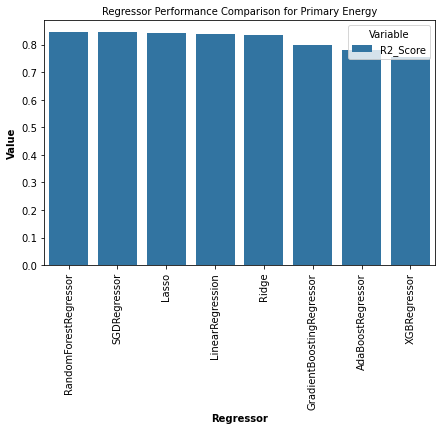

,Regressor,R2_Score
0,RandomForestRegressor,0.845903
5,SGDRegressor,0.844487
4,Lasso,0.842949
2,LinearRegression,0.839863
3,Ridge,0.836332
6,GradientBoostingRegressor,0.797395
1,AdaBoostRegressor,0.779174
7,XGBRegressor,0.753618


In [51]:
r2_dataframe = train_regressor_and_get_result(X_train_fs, X_test_fs, y_train, y_test)
plot_regressor_performance_plot(r2_df=r2_dataframe, title_column='Primary Energy')
r2_dataframe

<b> Finding the top features out of 7 which affect Primary Energy</b>

The Best Performing Regression Model is==> RandomForestRegressor
Y_pred [ 9273.64656 10540.14255 12553.30079 11830.1779  13432.44196 11639.8572
 12445.95231 13180.89872 13230.55284 11765.79929 13129.55384  9964.40586]
Y_test [ 7861.043  9896.162 12564.121 11453.215 13191.698 10938.794 12467.962
 12972.508 13080.902 11152.267 12642.669  8701.398]


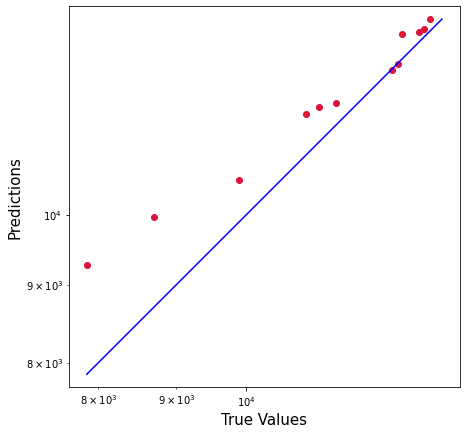

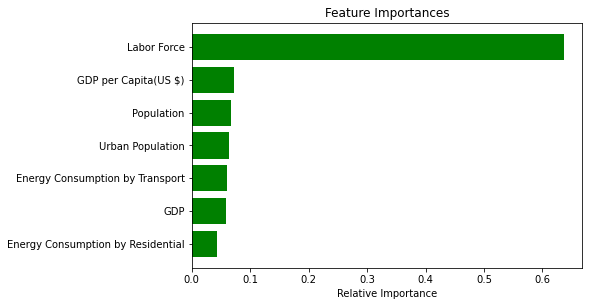

In [52]:
best_model_trained = train_topBest_model(r2_dataframe, X_train_fs, X_test_fs, y_train, y_test, training_features)

## Training Regression Model for 'Fossil Consumption'

In [53]:
X_train, X_test, y_train, y_test = get_data_prepared_for_different_models('Fossil Consumption')
X_train_fs, X_test_fs, training_features = select_best_features(num_of_features=7, X_train=X_train, X_test=X_test, 
                                                                y_train=y_train, y_test=y_test)

##################################################
The Target Variable is Fossil Consumption
##################################################


Selecting the 7 Best Features for the model Training.

                       IndependentColumns  KeepColumns
0                              Population        False
1                             Labor Force         True
2                                     GDP        False
3                 Value Added by Activity        False
4                        Urban Population        False
5                    GDP per Capita(US $)         True
6                          GNI(Million $)         True
7                       Final Consumption         True
8               Total Resource Rent(%GDP)         True
9          Energy Consumption by Industry         True
10        Energy Consumption by Transport        False
11      Energy Consumption by Residential        False
12  Energy consumption by Public Services        False
13           Energy Consumpti

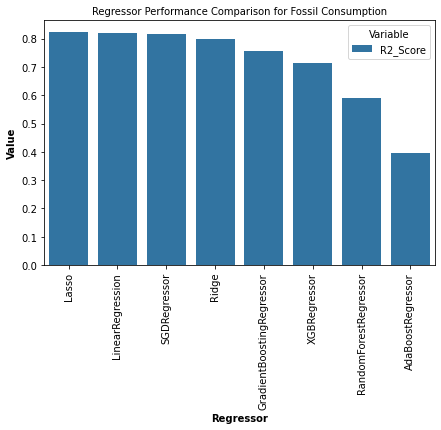

,Regressor,R2_Score
4,Lasso,0.823378
2,LinearRegression,0.821189
5,SGDRegressor,0.815731
3,Ridge,0.798635
6,GradientBoostingRegressor,0.757707
7,XGBRegressor,0.714466
0,RandomForestRegressor,0.591993
1,AdaBoostRegressor,0.396439


In [54]:
r2_dataframe = train_regressor_and_get_result(X_train_fs, X_test_fs, y_train, y_test)
plot_regressor_performance_plot(r2_df=r2_dataframe, title_column='Fossil Consumption')
r2_dataframe


<b> Finding the top features out of 7 which affect Fossil consumption</b>

The Best Performing Regression Model is==> Lasso
Y_pred [ 8317.94430593  9550.45406026 10268.13469444 10981.18837474
 10608.01108179  8243.60940639 10356.00061601 10573.71677544
 10113.93808625 10875.69866291  9661.56037682  8935.94995901]
Y_test [ 7413.145  9321.727 10131.376 10559.388 10576.714  7485.866 10197.094
 10407.441 10040.725 10264.482  9533.036  8183.842]


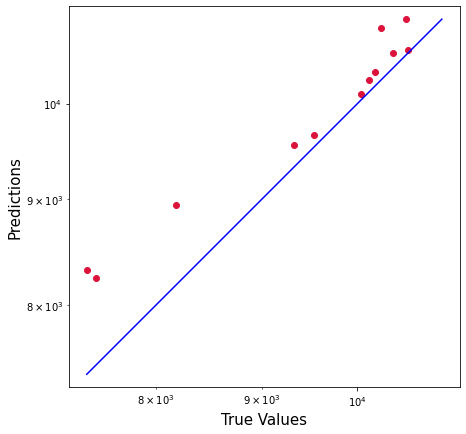



                        Attribute   Importance
0                     Labor Force  1581.525607
5  Energy Consumption by Industry   184.034827
3               Final Consumption   121.095216
4       Total Resource Rent(%GDP)    32.432762
6    Energy Consumption by Others   -12.502005
2                  GNI(Million $)  -399.022145
1            GDP per Capita(US $)  -960.630811




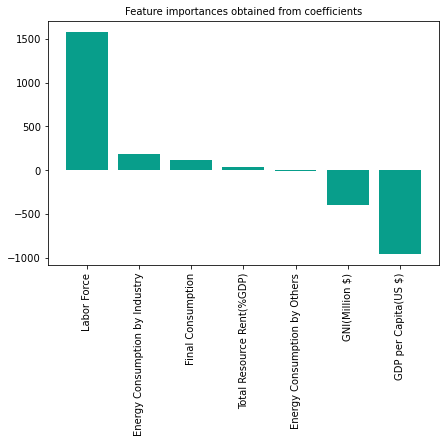

In [55]:
best_model_trained = train_topBest_model(r2_dataframe, X_train_fs, X_test_fs, y_train, y_test, training_features)

## Training Regression Model for 'Nuclear Consumption'

In [56]:
X_train, X_test, y_train, y_test = get_data_prepared_for_different_models('Nuclear Consumption')
X_train_fs, X_test_fs, training_features = select_best_features(num_of_features=7, X_train=X_train, X_test=X_test, 
                                                                y_train=y_train, y_test=y_test)

##################################################
The Target Variable is Nuclear Consumption
##################################################


Selecting the 7 Best Features for the model Training.

                       IndependentColumns  KeepColumns
0                              Population         True
1                             Labor Force         True
2                                     GDP         True
3                 Value Added by Activity        False
4                        Urban Population         True
5                    GDP per Capita(US $)         True
6                          GNI(Million $)        False
7                       Final Consumption        False
8               Total Resource Rent(%GDP)        False
9          Energy Consumption by Industry        False
10        Energy Consumption by Transport         True
11      Energy Consumption by Residential         True
12  Energy consumption by Public Services        False
13           Energy Consumpt

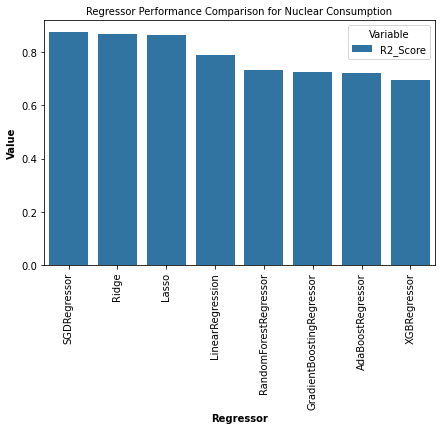

,Regressor,R2_Score
5,SGDRegressor,0.875239
3,Ridge,0.869284
4,Lasso,0.862695
2,LinearRegression,0.789641
0,RandomForestRegressor,0.733117
6,GradientBoostingRegressor,0.725438
1,AdaBoostRegressor,0.721628
7,XGBRegressor,0.695064


In [57]:
r2_dataframe = train_regressor_and_get_result(X_train_fs, X_test_fs, y_train, y_test)
plot_regressor_performance_plot(r2_df=r2_dataframe, title_column='Nuclear Consumption')
r2_dataframe


<b> Finding the top features out of 7 which affect Nuclear Energy</b>

The Best Performing Regression Model is==> SGDRegressor
Y_pred [ 344.60544019  876.65443114 1935.83793793  729.84562453 1876.97358516
 1405.47261137 1781.41248817 2183.448896   1924.23962297  500.52065525
 1679.3018656   418.08701936]
Y_test [  55.783  120.072 1917.451  350.791 2037.996 1327.611 1787.163 2014.504
 1845.308  309.647 1727.984   95.625]


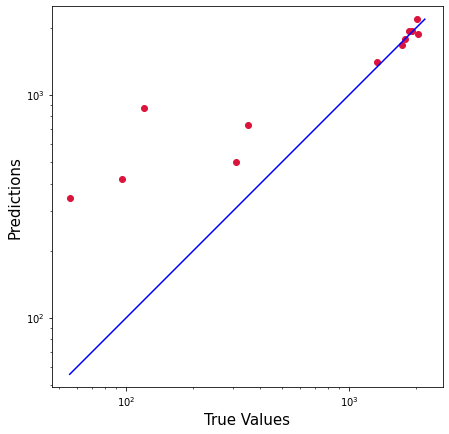



                           Attribute  Importance
4               GDP per Capita(US $)  391.159860
6  Energy Consumption by Residential  381.125465
1                        Labor Force  228.720620
2                                GDP  179.357603
5    Energy Consumption by Transport  -88.967094
3                   Urban Population -122.870575
0                         Population -218.154172




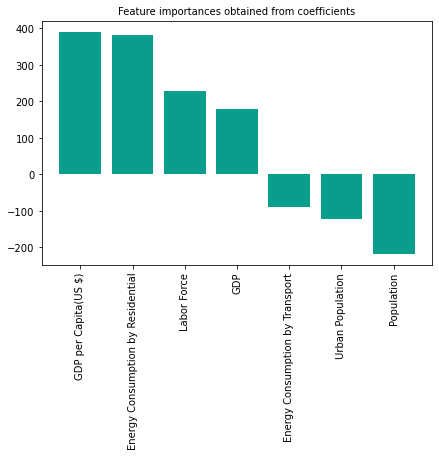

In [58]:
best_model_trained = train_topBest_model(r2_dataframe, X_train_fs, X_test_fs, y_train, y_test, training_features)

## Training Regression Model for 'Renewable Consumption'

In [59]:
X_train, X_test, y_train, y_test = get_data_prepared_for_different_models('Renewable Consumption')
X_train_fs, X_test_fs, training_features = select_best_features(num_of_features=7, X_train=X_train, X_test=X_test, 
                                                                y_train=y_train, y_test=y_test)

##################################################
The Target Variable is Renewable Consumption
##################################################


Selecting the 7 Best Features for the model Training.

                       IndependentColumns  KeepColumns
0                              Population         True
1                             Labor Force        False
2                                     GDP         True
3                 Value Added by Activity        False
4                        Urban Population         True
5                    GDP per Capita(US $)         True
6                          GNI(Million $)         True
7                       Final Consumption         True
8               Total Resource Rent(%GDP)        False
9          Energy Consumption by Industry        False
10        Energy Consumption by Transport        False
11      Energy Consumption by Residential        False
12  Energy consumption by Public Services         True
13           Energy Consum

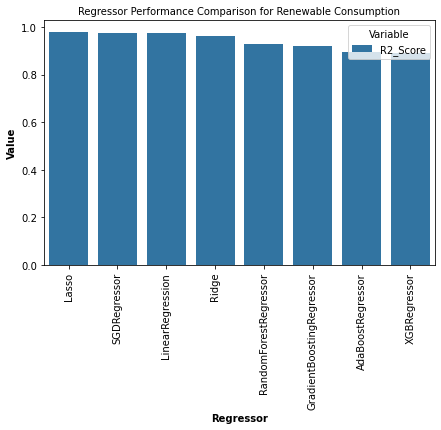

,Regressor,R2_Score
4,Lasso,0.978991
5,SGDRegressor,0.976958
2,LinearRegression,0.975862
3,Ridge,0.962572
0,RandomForestRegressor,0.930978
6,GradientBoostingRegressor,0.919728
1,AdaBoostRegressor,0.893613
7,XGBRegressor,0.892630


In [60]:
r2_dataframe = train_regressor_and_get_result(X_train_fs, X_test_fs, y_train, y_test)
plot_regressor_performance_plot(r2_df=r2_dataframe, title_column='Renewable Consumption')
r2_dataframe



<b> Finding the top features out of 7 which affect Renewable Energy</b>

The Best Performing Regression Model is==> Lasso
Y_pred [ 410.27378583  555.37702944  600.96744161  437.95815422  594.61041841
 2207.75434798  500.1258745   603.73197525 1227.76126268  454.27086756
 1391.03092976  516.72431277]
Y_test [ 392.115  454.363  515.294  543.036  576.988 2125.316  483.704  550.562
 1194.869  578.139 1381.65   421.932]


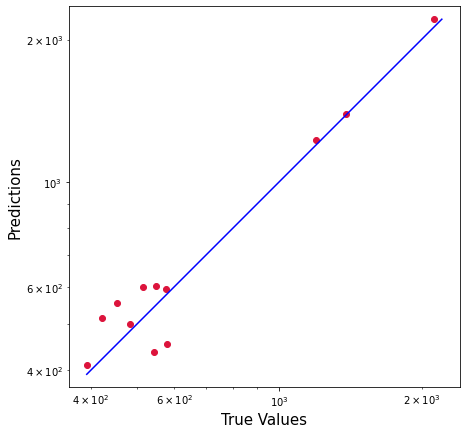



                               Attribute  Importance
4                         GNI(Million $)  866.972381
2                       Urban Population  357.869388
0                             Population    0.000000
1                                    GDP   -0.000000
6  Energy consumption by Public Services   -6.046181
3                   GDP per Capita(US $) -216.274005
5                      Final Consumption -579.452653




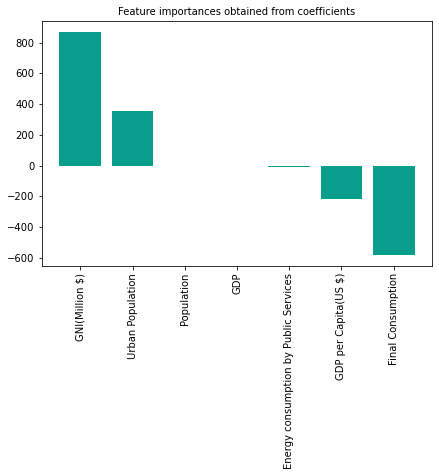

In [61]:
best_model_trained = train_topBest_model(r2_dataframe, X_train_fs, X_test_fs, y_train, y_test, training_features)

## Regression Analysis for Fossil Consumption and Green House Gas Emissions

Text(0.5, 20.80000000000002, 'Independent variable(Fossil Consumption)')

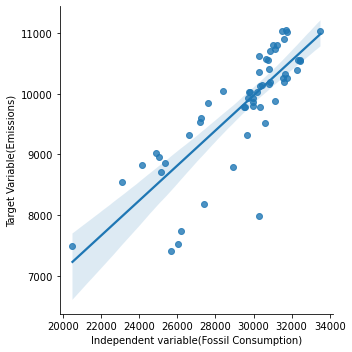

In [62]:
sns.lmplot(x="GHG Emissions", y='Fossil Consumption', data=new_df, order=1)
plt.ylabel('Target Variable(Emissions)')
plt.xlabel('Independent variable(Fossil Consumption)')

In [63]:
y = new_df[['GHG Emissions']]
X = new_df[['Fossil Consumption']]

In [64]:
X = sm.add_constant(X)
X.head()

,const,Fossil Consumption
0,1.0,7413.145
1,1.0,7522.357
2,1.0,7741.817
3,1.0,8183.842
4,1.0,8791.516


In [65]:
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          GHG Emissions   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     107.8
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.43e-14
Time:                        02:26:52   Log-Likelihood:                -499.64
No. Observations:                  57   AIC:                             1003.
Df Residuals:                      55   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6930.3167   2173.702      3.188      0.002    2574.121    1.13e+04
Fossil Consumption     2.2929      0.221     10.382      0.000       1.850       2.735
==============================================================================
Omnibus:                        2.519   Durbin-Watson:                   0.587
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.928
Skew:                          -0.002   Prob(JB):                        0.381
Kurtosis:                       3.901   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b> R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.656 would mean our model explains 66.2% of the change in our "GHG Emissions" variable. </br></br>
 Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, the model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. </br></br>
The *const* is the result of our model if all variables were tuned to 0. In the classic ‘y = mx+b’ linear formula, it is our b, a constant added to explain a starting value for our line. </br></br>
Our first informative column is the coefficient. For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

<b>

---

Text(0.5, 0, 'Independent variable x')

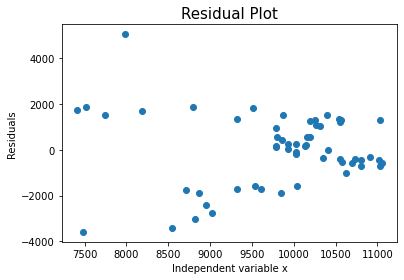

In [66]:
predictions = model_result.predict(X)
# residuals = new_df['Fossil Consumption'] - predictions
residuals = new_df['GHG Emissions'] - predictions
plt.scatter(y=residuals, x=new_df['Fossil Consumption'])
plt.title('Residual Plot', size=15)
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

<p>A residual plot shows the difference between the observed response and the fitted response values. If you can detect a clear pattern or trend in your residuals, then your model has room for improvement.</p>
<p>However, here we do not find any kind of pattern, therefore we can say that the linear regression model trained for GHG Emission vs Fossil Consumption is quite effective</p>

In [67]:
from scipy import stats
mu, std = stats.norm.fit(model_result.resid)
mu, std

(1.5956047399525056e-12, 1551.059015283948)

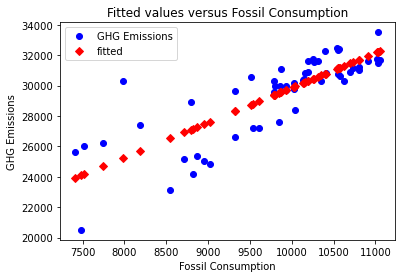

In [68]:
sm.graphics.plot_fit(model_result,1, vlines=False);

----
## End of Notebook ##